# Part I - PISA Student Survey Dataset Investigation
## by Mohamed E. Rahmani


## Table of Content:
   * #### [Preliminary Wrangling](#pre-wrangle)
   * #### [What is the structure of the dataset?](#structure)
   * #### [What are the main features of interest in your dataset?](#feature-selection)
   * #### [Important notes to consider](#important-notes)
   * #### [Data Cleaning](#cleaning)
   * #### [Univariate Exploration](#univariate-exploration)
   * #### [Bivariate Exploration](#bivariate-exploration)
   * #### [Multivariate Exploration](#multivariate-exploration)
   * #### [Conclusions](#conclusion)
## Introduction

The PISA student survey is a questionaire aimed to collect information from students nearing the end of their compulsory education. The study collected over 600 features from different economies, measuring financial literacy and problem solving skills, as well as scores in reading, maths and science.

For this exploration, the features will be preselected to observe the relations if any, and see if certain conditions (wealth, computer use, etc) affect the students scores differently.


## Preliminary Wrangling <a class='anchor' id ='pre-wrangle'></a>


In [37]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Add requests library to access links, 
# OS library to check for directories and files
# zipfile to unzip files
import requests
import os
from zipfile import ZipFile as zip

import warnings
warnings.simplefilter("ignore")

### Data Warngling:
First, I wrote the code block below that will download and unzips the dataset file. The code will also check if the file was pending download (in case of bad internet since the file is big, and my transfer speeds are slow), allowing us to resume download when needed. It will also check if the file has been unzipped, to save time when running the notebook after closing it without having to redownload and unzip all over again.

In [38]:
# Check if the dataset is available in our directory, if not download it from https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip

def file_save(url: str):
    '''
    This function is used to manage saving of files to enhance reproducability 
    with least user 'manual' input.

    inputs:
    url: str    # url to the file to be downloaded

    returns:
    None
    '''
    filename = url.split('/')[-1]
    
    # grab header information to check download size
    header = requests.head(url)
    download_size = header.headers['Content-Length']

    #check if the file exists and if it is fully downloaded
    if os.path.exists(filename):
        filesize = os.path.getsize(filename)
        if int(filesize) < int(download_size):
            savemode = 'ab'
        if int(filesize) >= int(download_size):
            print(f'{filename} already downloaded.')
            return 0

            
    else:
        savemode = 'wb'
        filesize = 0

    #Adjust message
    if savemode == 'wb':
        print(f'Downloading {filename}...')
    if savemode == 'ab':
        print(f'Resuming {filename}...')




    # if the file exists check if it's complete
    header = {'Range' : f'bytes={filesize}-'}
    with open(filename,savemode) as file:
        progress = 0
        rq = requests.get(url, stream=True, headers=header)
        for chunk in rq.iter_content(chunk_size=4096):
            file.write(chunk)
            progress+=4096
            print(f'{(int(progress)/int(download_size))*100:0.2f}%', end="\r")
        

url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip'

file_save(url)
filename = url.split('/')[-1]

if os.path.exists(filename.replace('.zip','')):
    print(f"{filename.replace('.zip','')} already unzipped.")
else:
    with zip(filename, 'r') as file:
        print('Extracting dataset from zipfile... please wait...')
        file.extractall()
        print('The zip files has been extracted successfully.')



pisa2012.csv.zip already downloaded.
pisa2012.csv already unzipped.


In [39]:
#loading the csv file into df_pisa dataframe
csv_file = filename.replace('.zip','')
# there was an error in UTF-8 encoding so i had to use latin-1 to fix it
# the columns to be used: 
"""
Details relating to student:
"STIDSTD" : Student ID
"ST04Q01" : Gender
"CNT"     : Country code
"EC06Q01" : Age Started Learning
"PV1MATH" : Plausible Score Math
"PV1READ" : Plausible Score Reading
"PV1SCIE" : Plausible Value Science              
Details surrounding the student
WEALTH 
"TIMEINT"  : Time of computer use
"TEACHSUP" : Teacher Support
"TESTLANG" : Language of Test
"OUTHOURS" : Studytime out of school

Details relating to activities done by student:
"ST57Q01" : Homework out of school TIME
"ST57Q02" : Guided Homweork ``
"ST57Q03" : Personal Tutor ``
"ST57Q04" :  Commercial Company ``
"ST57Q05" : With Parent ``
"ST57Q06" : Computer ```

"EC04Q06A" : Student Financing at school
"EC04Q06B" : Student Financing out of school
"EC04Q06C" : No Student financing skills
"INFOCAR"  : Info about careers
"IC08Q01"  : Out of school Single player games
"IC08Q02"  : `` `` `` multiplayer games
"IC08Q05"  : `` `` `` Social Networks
"IC08Q07"  : `` `` `` Read News
"""
cols = ["STIDSTD" ,"ST04Q01" ,"CNT" ,"PV1MATH" ,"PV1READ", "PV1SCIE" ,"EC05Q01",
        "EC06Q01" ,"WEALTH" , "TIMEINT" ,"TEACHSUP" ,"TESTLANG" ,"OUTHOURS" ,
        "ST57Q01" ,"ST57Q02" , "ST57Q03" ,"ST57Q04" ,"ST57Q05" ,"ST57Q06" ,
        "EC04Q06A" ,"EC04Q06B" , "EC04Q06C" ,"INFOCAR" ,"IC08Q01" ,
        "IC08Q02" ,"IC08Q05" ,"IC08Q07" ]

df_pisa = pd.read_csv(csv_file,encoding = 'latin-1', usecols=cols)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df_pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 27 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CNT       485490 non-null  object 
 1   STIDSTD   485490 non-null  int64  
 2   ST04Q01   485490 non-null  object 
 3   ST57Q01   301367 non-null  float64
 4   ST57Q02   269808 non-null  float64
 5   ST57Q03   283813 non-null  float64
 6   ST57Q04   279657 non-null  float64
 7   ST57Q05   289502 non-null  float64
 8   ST57Q06   289428 non-null  float64
 9   IC08Q01   294123 non-null  object 
 10  IC08Q02   293646 non-null  object 
 11  IC08Q05   293822 non-null  object 
 12  IC08Q07   293570 non-null  object 
 13  EC04Q06A  169643 non-null  float64
 14  EC04Q06B  169640 non-null  float64
 15  EC04Q06C  169636 non-null  float64
 16  EC05Q01   129658 non-null  object 
 17  EC06Q01   40345 non-null   object 
 18  INFOCAR   165792 non-null  float64
 19  OUTHOURS  308799 non-null  float64
 20  TEAC

In [ ]:
df_pisa.head()

,CNT,STIDSTD,ST04Q01,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,IC08Q01,...,EC06Q01,INFOCAR,OUTHOURS,TEACHSUP,TESTLANG,TIMEINT,WEALTH,PV1MATH,PV1READ,PV1SCIE
0,Albania,1,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.68,Albanian,NaN,-2.92,406.8469,249.5762,341.7009
1,Albania,2,Female,NaN,NaN,6.0,0.0,0.0,2.0,NaN,...,NaN,NaN,8.0,NaN,Albanian,NaN,0.69,486.1427,406.2936,548.9929
2,Albania,3,Female,NaN,6.0,6.0,7.0,2.0,3.0,NaN,...,NaN,NaN,24.0,NaN,Albanian,NaN,-0.23,533.2684,401.2100,499.6643
3,Albania,4,Female,10.0,2.0,2.0,0.0,0.0,3.0,NaN,...,NaN,NaN,17.0,1.68,Albanian,NaN,-1.17,412.2215,547.3630,438.6796
4,Albania,5,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.11,Albanian,NaN,-1.17,381.9209,311.7707,361.5628


##### Tidiness Issue: 
The data heads are not human readable.

##### Solution:
Replace column names with human-readable columns

##### Code:


In [ ]:
df_pisa.columns
# the column names should be changed to be more human-readable

Index(['CNT', 'STIDSTD', 'ST04Q01', 'ST57Q01', 'ST57Q02', 'ST57Q03', 'ST57Q04',
       'ST57Q05', 'ST57Q06', 'IC08Q01', 'IC08Q02', 'IC08Q05', 'IC08Q07',
       'EC04Q06A', 'EC04Q06B', 'EC04Q06C', 'EC05Q01', 'EC06Q01', 'INFOCAR',
       'OUTHOURS', 'TEACHSUP', 'TESTLANG', 'TIMEINT', 'WEALTH', 'PV1MATH',
       'PV1READ', 'PV1SCIE'],
      dtype='object')

In [ ]:
# setting up the dictionary 
# OOS = Out of School
column_names = {
    "STIDSTD"   : 'student_id',
    "ST04Q01"   : 'gender',
    "CNT"       : 'country',
    "PV1MATH"   : 'score_math',
    "PV1READ"   : 'score_reading',
    "PV1SCIE"   : 'score_science',
    "EC05Q01"   : 'first_language_learned',
    "EC06Q01"   : 'age_start_learning',
    'WEALTH'    : 'wealth',
    "TIMEINT"   : 'computer_use_time',
    "TEACHSUP"  : 'teacher_support',
    "TESTLANG"  : 'test_language',
    "OUTHOURS"  : 'OOS_study_time',
    "ST57Q01"   : "OOS_homework_time",
    "ST57Q02"   : "OOS_guided_homework",
    "ST57Q03"   : "OOS_personal_tutor",
    "ST57Q04"   :  "OOS_commercial_company",
    "ST57Q05"   : "OOS_with_parent",
    "ST57Q06"   : "OOS_computer_time",
    "EC04Q06A"  : "finance_knowledge_at_school",
    "EC04Q06B"  : "OOS_finance_knowledge",
    "EC04Q06C"  : "no_finance_skills",
    "INFOCAR"   : "career_info",
    "IC08Q01"   : "OOS_single_player_games",
    "IC08Q02"   : "OOS_multi_player_games",
    "IC08Q05"   : "OOS_social_media",
    "IC08Q07"   : "OOS_read_news"
    }

In [ ]:
# renaming columns
df_pisa = df_pisa.rename(columns=column_names)

In [ ]:
# checking random samples
df_pisa.sample(10)

,country,student_id,gender,OOS_homework_time,OOS_guided_homework,OOS_personal_tutor,OOS_commercial_company,OOS_with_parent,OOS_computer_time,OOS_single_player_games,...,age_start_learning,career_info,OOS_study_time,teacher_support,test_language,computer_use_time,wealth,score_math,score_reading,score_science
195422,United Kingdom,6306,Male,5.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,5.0,0.34,English,NaN,1.85,548.6914,554.7673,576.8743
105230,Switzerland,9217,Female,3.0,0.0,0.0,0.0,0.0,1.0,Never or hardly ever,...,NaN,NaN,4.0,0.61,German,21.0,-0.13,593.7919,531.0003,559.2503
344467,Mexico,28765,Male,2.0,1.0,0.0,0.0,1.0,2.0,Never or hardly ever,...,NaN,NaN,6.0,1.68,Spanish,54.0,-0.65,488.6353,486.7624,478.9631
483488,Vietnam,2958,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.68,Vietnamese,NaN,-1.77,544.7967,577.6263,594.0321
266632,Italy,26043,Male,NaN,NaN,NaN,NaN,NaN,NaN,Never or hardly ever,...,NaN,-0.8214,NaN,-0.86,Italian,51.0,0.31,490.1153,412.9835,492.8571
369066,New Zealand,471,Female,3.0,3.0,4.0,3.0,5.0,5.0,Once or twice a month,...,NaN,0.1310,23.0,NaN,English,32.0,0.84,380.8303,484.6125,442.6893
2659,Albania,2660,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.09,Albanian,NaN,-2.59,410.0405,439.2071,447.5382
474607,Uruguay,4370,Male,5.0,3.0,0.0,0.0,0.0,3.0,Once or twice a month,...,NaN,NaN,11.0,1.68,Spanish,28.0,-0.96,442.6780,414.6675,487.7285
121344,Colombia,7246,Female,20.0,4.0,1.0,NaN,2.0,NaN,NaN,...,NaN,NaN,27.0,NaN,Spanish,NaN,1.03,437.9265,468.1703,452.0142
80557,Canada,6088,Male,2.0,1.0,1.0,1.0,1.0,0.0,NaN,...,0 to 3 years,-1.3496,6.0,0.11,French,NaN,-0.12,511.6140,435.4379,432.8049


In [ ]:
# Checking the nulls percentage, the lower the better
def check_nulls(df):
    for i,j in enumerate(df.columns):
        print(f"{i+1}. {j:-<20} = {df[j].isnull().sum()/df.shape[0] *100:->12.2f}% nulls")
check_nulls(df_pisa)

1. country------------- = --------0.00% nulls
2. student_id---------- = --------0.00% nulls
3. gender-------------- = --------0.00% nulls
4. OOS_homework_time--- = -------37.93% nulls
5. OOS_guided_homework- = -------44.43% nulls
6. OOS_personal_tutor-- = -------41.54% nulls
7. OOS_commercial_company = -------42.40% nulls
8. OOS_with_parent----- = -------40.37% nulls
9. OOS_computer_time--- = -------40.38% nulls
10. OOS_single_player_games = -------39.42% nulls
11. OOS_multi_player_games = -------39.52% nulls
12. OOS_social_media---- = -------39.48% nulls
13. OOS_read_news------- = -------39.53% nulls
14. finance_knowledge_at_school = -------65.06% nulls
15. OOS_finance_knowledge = -------65.06% nulls
16. no_finance_skills--- = -------65.06% nulls
17. first_language_learned = -------73.29% nulls
18. age_start_learning-- = -------91.69% nulls
19. career_info--------- = -------65.85% nulls
20. OOS_study_time------ = -------36.39% nulls
21. teacher_support----- = -------34.83% nulls
22. t

In [ ]:
df_pisa.shape

(485490, 27)

### What is the structure of your dataset? <a class='anchor' id ='structure'></a>

27 total columns (pre-selected from 600+ total columns), and 485,490 rows

### What are the main features of interest in your dataset?
There are 27 total features that are interesting to study. These can be clustered into
three main categories: features relating to student (gender, nationality, age), features
relating to school activities, and features relating to out of school actiivities. 
The `score_math`, `score_science`, and `score_reading` features will be the main focus to measure the performance of students, and contrast the effect of the other features on these performance indicators.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest? <a class='anchor' id ='feature-selection'></a>

Besides features related to information about student, the selected features will be examined and compared against `score` as a measure of performance. The list of the selected features are:
#####   A. Related to the student:
1.  `STIDSTD`   : 'student_id'
2.  `ST04Q01`   : 'gender'
3.  `CNT`       : 'country'
4.  `PV1MATH`   : 'score_math'
5.  `PV1READ`   : 'score_reading'
6.  `PV1SCIE`   : 'score_science'
6.  `EC05Q01`   : 'first_language_learned'
7.  `EC06Q01`   : 'age_start_learning'
8.  `WEALTH`    : 'wealth'

#####   B. Related to acitivities done by the student in school:
1.  `TESTLANG`  : 'test_language'
2.  `INFOCAR`   : "career_info"
3.  `TIMEINT`   : 'computer_use_time'
4.  `TEACHSUP`  : 'teacher_support'
5.  `EC04Q06A`  : "finance_knowledge_at_school"

#####   C. Related to activities done by the student out of school (OOS):
1.  `OUTHOURS`  : 'OOS_study_time'
2.  `ST57Q01`   : "OOS_homework_time"
3.  `ST57Q02`   : "OOS_guided_homework"
4.  `ST57Q03`   : "OOS_personal_tutor"
5.  `ST57Q04`   :  "OOS_commercial_company"
6.  `ST57Q05`   : "OOS_with_parent"
7.  `ST57Q06`   : "OOS_computer_time"
8.  `EC04Q06B`  : "OOS_finance_knowledge"
9.  `EC04Q06C`  : "no_finance_skills"
10.  `IC08Q01`  : "OOS_single_player_games"
11.  `IC08Q02`  : "OOS_multi_player_games"
12.  `IC08Q05`  : "OOS_social_media"
13.  `IC08Q07`  : "OOS_read_news" 

#### Important notes regarding issues within the data: <a class='anchor' id ='important-notes'></a>

* The `df_pisa` table should be split to 3 tables to better focus observations
* For each observation, the way we will deal with the missing values is to ommit entries that are lacking more than one feature. This is to preserve the integrity of the data and avoid '



## Data Cleaning <a class='anchor' id ='cleaning'></a>

#### Tidiness issue: 
split the `df_pisa` dataframe to 3 sub tables: 
1. `df_student`
2. `df_school`
3. `df_OOS`

#### Solution:
The three dataframes will have student ID and final weight, besides the respective features.
* `df_student` will have the following:
    1.  `STIDSTD`   : 'student_id'
    2.  `ST04Q01`   : 'gender'
    3.  `CNT`       : 'country'
    4.  `PV1MATH`   : 'Plausible Score Math'
    5.  `PV1READ`   : 'Plausible Score Reading'
    6.  `PV1SCIE`   : 'Plausible Score Science'
    6.  `EC05Q01`   : 'first_language_learned'
    7.  `EC06Q01`   : 'age_start_learning'
    8.  `WEALTH`    : 'wealth'



* `df_school` will have the following:
    1.  `TESTLANG` : 'test_language'
    2.  `INFOCAR` : "career_info"
    3.  `TIMEINT` : 'computer_use_time'
    4.  `TEACHSUP` : 'teacher_support'
    5.  `EC04Q06A` : "finance_knowledge_at_school"



* `df_OOS` will have the following:
    1.  `OUTHOURS` : 'OOS_study_time'
    2.  `ST57Q01` : "OOS_homework_time"
    3.  `ST57Q02` : "OOS_guided_homework"
    4.  `ST57Q03` : "OOS_personal_tutor"
    5.  `ST57Q04` :  "OOS_commercial_company"
    6.  `ST57Q05` : "OOS_with_parent"
    7.  `ST57Q06` : "OOS_computer_time"
    8.  `EC04Q06B` : "OOS_finance_knowledge"
    9.  `EC04Q06C` : "no_finance_skills"
    10.  `IC08Q01` : "OOS_single_player_games"
    11.  `IC08Q02` : "OOS_multi_player_games"
    12.  `IC08Q05` : "OOS_social_media"
    13.  `IC08Q07` : "OOS_read_news" 

#### Code: 


In [ ]:
# defining the columns 
# adding the scores to and student id to each observation table
student_col = [
'student_id',
'gender',
'country', 
'first_language_learned',
'age_start_learning',
'wealth',
'score_math',
'score_reading',
'score_science'
]

school_col = ['student_id',
'test_language',
"career_info",
'computer_use_time',
'teacher_support',
"finance_knowledge_at_school",
'score_math',
'score_reading',
'score_science'
]

OOS_col = ['student_id',
"OOS_study_time",
"OOS_homework_time",
"OOS_guided_homework",
"OOS_personal_tutor",
"OOS_commercial_company",
"OOS_with_parent",
"OOS_computer_time",
"OOS_finance_knowledge",
"no_finance_skills",
"OOS_single_player_games",
"OOS_multi_player_games",
"OOS_social_media",
"OOS_read_news",
'score_math',
'score_reading',
'score_science'
]

In [ ]:
df_student = df_pisa[student_col].copy()
df_school = df_pisa[school_col].copy()
df_OOS = df_pisa[OOS_col].copy()


### Test:


In [ ]:
check_nulls(df_school)
df_school.info()
df_school.sample(5)

1. student_id---------- = --------0.00% nulls
2. test_language------- = --------0.16% nulls
3. career_info--------- = -------65.85% nulls
4. computer_use_time--- = -------38.81% nulls
5. teacher_support----- = -------34.83% nulls
6. finance_knowledge_at_school = -------65.06% nulls
7. score_math---------- = --------0.00% nulls
8. score_reading------- = --------0.00% nulls
9. score_science------- = --------0.00% nulls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   student_id                   485490 non-null  int64  
 1   test_language                484697 non-null  object 
 2   career_info                  165792 non-null  float64
 3   computer_use_time            297074 non-null  float64
 4   teacher_support              316371 non-null  float64
 5   finance_knowledge_at_school  169643 non-null  float

,student_id,test_language,career_info,computer_use_time,teacher_support,finance_knowledge_at_school,score_math,score_reading,score_science
477184,1632,English,NaN,NaN,NaN,NaN,438.8612,411.9409,441.9433
20067,3825,Spanish,NaN,NaN,0.61,NaN,416.1162,405.1244,479.9888
167644,22062,Spanish,NaN,NaN,-0.47,NaN,663.0394,590.2133,546.1954
81648,7179,English,NaN,NaN,NaN,NaN,375.6894,340.8084,369.6755
93155,18686,English,0.6025,NaN,NaN,1.0,550.2493,551.1757,515.6098


In [ ]:
check_nulls(df_student)
df_student.info()
df_student.sample(5)


1. student_id---------- = --------0.00% nulls
2. gender-------------- = --------0.00% nulls
3. country------------- = --------0.00% nulls
4. first_language_learned = -------73.29% nulls
5. age_start_learning-- = -------91.69% nulls
6. wealth-------------- = --------1.21% nulls
7. score_math---------- = --------0.00% nulls
8. score_reading------- = --------0.00% nulls
9. score_science------- = --------0.00% nulls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   student_id              485490 non-null  int64  
 1   gender                  485490 non-null  object 
 2   country                 485490 non-null  object 
 3   first_language_learned  129658 non-null  object 
 4   age_start_learning      40345 non-null   object 
 5   wealth                  479597 non-null  float64
 6   score_math              485490 non-nu

,student_id,gender,country,first_language_learned,age_start_learning,wealth,score_math,score_reading,score_science
130356,2583,Female,Czech Republic,NaN,NaN,-0.11,456.9325,522.7394,493.1369
443635,41,Female,Sweden,NaN,NaN,-0.61,528.4390,569.5243,538.6423
148358,2776,Female,Spain,NaN,NaN,-0.36,583.2762,630.0507,619.3025
69548,14283,Female,Brazil,NaN,NaN,-1.03,504.6035,614.8000,596.5498
76943,2474,Female,Canada,<test language> or <other official national la...,NaN,-0.61,575.9542,585.3311,557.5718


In [ ]:
df_student.first_language_learned.unique()
#The results of this column are incomprehensible, plus it's missing 73% of it's values
#considering dropping the feature

array([nan,
       '<test language> or <other official national language(s) or d',
       'other than <test language> or <other official national langu'],
      dtype=object)

In [ ]:
check_nulls(df_OOS)

df_OOS.sample(5)

1. student_id---------- = --------0.00% nulls
2. OOS_study_time------ = -------36.39% nulls
3. OOS_homework_time--- = -------37.93% nulls
4. OOS_guided_homework- = -------44.43% nulls
5. OOS_personal_tutor-- = -------41.54% nulls
6. OOS_commercial_company = -------42.40% nulls
7. OOS_with_parent----- = -------40.37% nulls
8. OOS_computer_time--- = -------40.38% nulls
9. OOS_finance_knowledge = -------65.06% nulls
10. no_finance_skills--- = -------65.06% nulls
11. OOS_single_player_games = -------39.42% nulls
12. OOS_multi_player_games = -------39.52% nulls
13. OOS_social_media---- = -------39.48% nulls
14. OOS_read_news------- = -------39.53% nulls
15. score_math---------- = --------0.00% nulls
16. score_reading------- = --------0.00% nulls
17. score_science------- = --------0.00% nulls


,student_id,OOS_study_time,OOS_homework_time,OOS_guided_homework,OOS_personal_tutor,OOS_commercial_company,OOS_with_parent,OOS_computer_time,OOS_finance_knowledge,no_finance_skills,OOS_single_player_games,OOS_multi_player_games,OOS_social_media,OOS_read_news,score_math,score_reading,score_science
355560,1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,418.5309,423.5301,442.0366
282076,3376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,576.2658,577.6263,605.3152
43057,1671,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,Never or hardly ever,Never or hardly ever,Every day,Never or hardly ever,557.4155,506.8532,556.5461
109682,2440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never or hardly ever,Never or hardly ever,Every day,Every day,371.9505,446.5651,323.9836
272957,1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never or hardly ever,Once or twice a month,Once or twice a month,Once or twice a month,398.6680,383.1511,358.7654


In [ ]:
df_OOS.OOS_personal_tutor.unique()

array([nan,  6.,  2.,  9.,  0., 10.,  3.,  4.,  8.,  1.,  7.,  5., 14.,
       13., 11., 15., 12., 17., 24., 20., 21., 18., 25., 23., 30., 28.,
       16., 26., 19., 27., 29., 22.])

In [ ]:
df_OOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   student_id               485490 non-null  int64  
 1   OOS_study_time           308799 non-null  float64
 2   OOS_homework_time        301367 non-null  float64
 3   OOS_guided_homework      269808 non-null  float64
 4   OOS_personal_tutor       283813 non-null  float64
 5   OOS_commercial_company   279657 non-null  float64
 6   OOS_with_parent          289502 non-null  float64
 7   OOS_computer_time        289428 non-null  float64
 8   OOS_finance_knowledge    169640 non-null  float64
 9   no_finance_skills        169636 non-null  float64
 10  OOS_single_player_games  294123 non-null  object 
 11  OOS_multi_player_games   293646 non-null  object 
 12  OOS_social_media         293822 non-null  object 
 13  OOS_read_news            293570 non-null  object 
 14  scor

In [ ]:
# checking unique countries
df_student.country.unique()

# some entries are sublists of one country (i.e. USA, Russia and China)

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

##### Quality Issue:
There are entries of same country under different formats (i.e. USA and United States of America)

##### Solution:
Map the names in a dictionary and replace them accordingly.

##### Code:

In [ ]:
cnt = {
    "(USA)" : "United States of America",
    "Chin" : "China",
    "Russia" : "Russian Federation"
}
def ren(x):
    if any([x.__contains__(y) for y in cnt]):
        return [cnt[y] for y in cnt if x.__contains__(y) ][0]
    else:
        return x
df_student.country=df_student.country.apply(ren)
df_student.country.unique()


array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'China', 'Croatia', 'Hungary',
       'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Jordan',
       'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Latvia', 'Mexico', 'Montenegro', 'Malaysia',
       'Netherlands', 'Norway', 'New Zealand', 'Peru', 'Poland',
       'Portugal', 'Qatar', 'Russian Federation',
       'United States of America', 'Romania', 'Singapore', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Sweden', 'Thailand', 'Tunisia',
       'Turkey', 'Uruguay', 'Vietnam'], dtype=object)

In [ ]:
df_OOS.head()



,student_id,OOS_study_time,OOS_homework_time,OOS_guided_homework,OOS_personal_tutor,OOS_commercial_company,OOS_with_parent,OOS_computer_time,OOS_finance_knowledge,no_finance_skills,OOS_single_player_games,OOS_multi_player_games,OOS_social_media,OOS_read_news,score_math,score_reading,score_science
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.8469,249.5762,341.7009
1,2,8.0,NaN,NaN,6.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,486.1427,406.2936,548.9929
2,3,24.0,NaN,6.0,6.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,533.2684,401.2100,499.6643
3,4,17.0,10.0,2.0,2.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,412.2215,547.3630,438.6796
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,381.9209,311.7707,361.5628


### General Approach to Missing Data (NaN):

The missing data in many features could be filled in with either mean average, or zeros assuming that the student didnt have an answer thus zero.
However, making such an assumption for largely missing data (such as 65% on financial knowledge) might skew the distribution and blemish the insights that would be drawn soon.

The alternative to the aforementioned solutions is to simply exclude incomplete entries. Having split the main `df_pisa` data frame into three sub-observations might help limiting the
removal of rows that have missing data in one observation but are otherwise complete in other observations. The compromise on removing the `null`  rows is reducing the sample size by more than 70%.

#### Quality Issue: 

missing values in some features


In [ ]:
# dropping missing values
df_OOS = df_OOS.dropna()
df_OOS.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 77528 entries, 22151 to 443592
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               77528 non-null  int64  
 1   OOS_study_time           77528 non-null  float64
 2   OOS_homework_time        77528 non-null  float64
 3   OOS_guided_homework      77528 non-null  float64
 4   OOS_personal_tutor       77528 non-null  float64
 5   OOS_commercial_company   77528 non-null  float64
 6   OOS_with_parent          77528 non-null  float64
 7   OOS_computer_time        77528 non-null  float64
 8   OOS_finance_knowledge    77528 non-null  float64
 9   no_finance_skills        77528 non-null  float64
 10  OOS_single_player_games  77528 non-null  object 
 11  OOS_multi_player_games   77528 non-null  object 
 12  OOS_social_media         77528 non-null  object 
 13  OOS_read_news            77528 non-null  object 
 14  score_math       

In [ ]:
#dropping missing values
df_student = df_student.dropna()
df_student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36718 entries, 36634 to 443586
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              36718 non-null  int64  
 1   gender                  36718 non-null  object 
 2   country                 36718 non-null  object 
 3   first_language_learned  36718 non-null  object 
 4   age_start_learning      36718 non-null  object 
 5   wealth                  36718 non-null  float64
 6   score_math              36718 non-null  float64
 7   score_reading           36718 non-null  float64
 8   score_science           36718 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.8+ MB


In [ ]:
#dropping missing values
df_school = df_school.dropna()
df_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90544 entries, 22151 to 443594
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_id                   90544 non-null  int64  
 1   test_language                90544 non-null  object 
 2   career_info                  90544 non-null  float64
 3   computer_use_time            90544 non-null  float64
 4   teacher_support              90544 non-null  float64
 5   finance_knowledge_at_school  90544 non-null  float64
 6   score_math                   90544 non-null  float64
 7   score_reading                90544 non-null  float64
 8   score_science                90544 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


In [ ]:
#saving the datasets
import pickle


with open("saved_datasets.pkl", "wb+") as pkl:
    pickle.dump((df_OOS, df_student), pkl)

## Univariate Exploration <a class='anchor' id ='univariate-exploration'></a>



#### Question 1: Distribution of Scores: Math, Science, Reading

#### Are the scores skewed or normally distibuted?


In [ ]:
df_pisa.score_math.describe()


count    485490.000000
mean        469.621653
std         103.265391
min          19.792800
25%         395.318600
50%         466.201900
75%         541.057800
max         962.229300
Name: score_math, dtype: float64

In [ ]:
df_pisa.score_science.describe()


count    485490.000000
mean        475.769824
std         101.464426
min           2.648300
25%         404.457300
50%         475.699400
75%         547.780700
max         903.338300
Name: score_science, dtype: float64

In [ ]:
df_pisa.score_reading.describe()

count    485490.000000
mean        472.004640
std         102.505523
min           0.083400
25%         403.600700
50%         475.455000
75%         544.502500
max         904.802600
Name: score_reading, dtype: float64

#### Visualization:
Note that since the scores are my major concern, I am plotting the data from the main data frame `df_pisa` over `df_student` to check if the features has skewed or shifted due to my clean up decision (drop na instead of fill na).

This is still a univariate exploration.

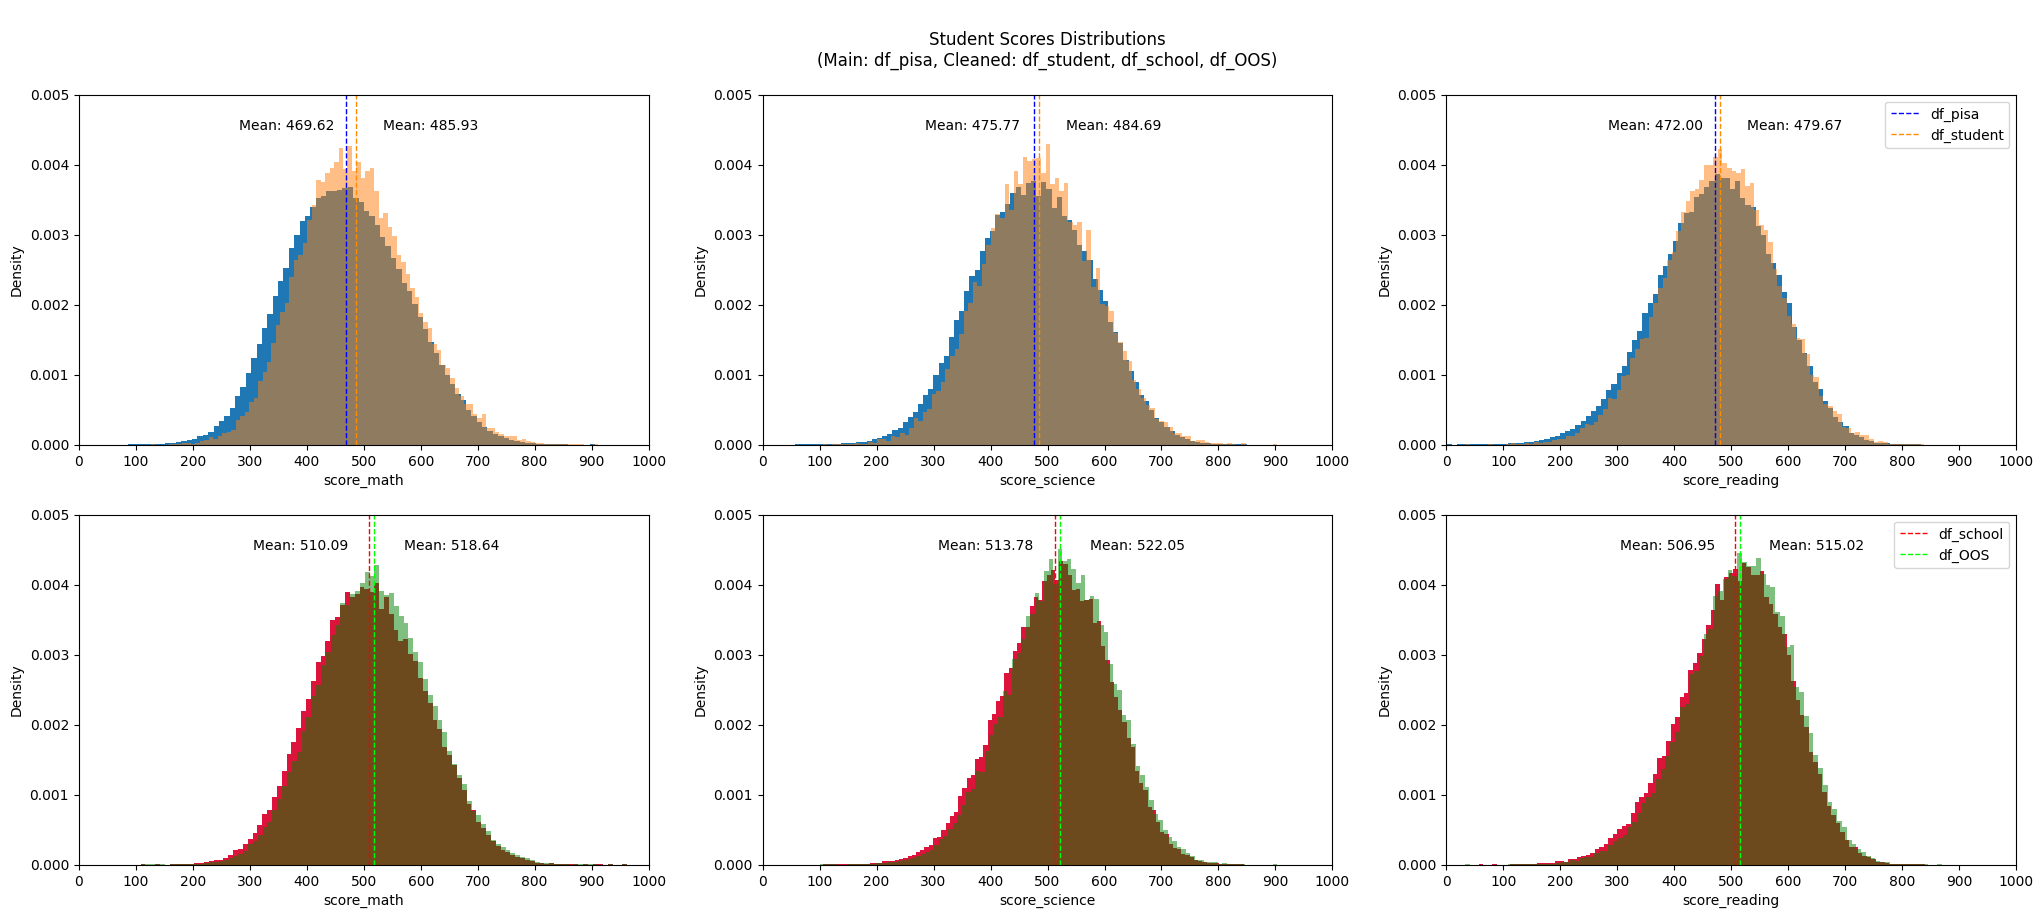

In [ ]:
plt.figure(2, figsize=(25,10));
plt.grid(visible = True);

cols = ['score_math','score_science','score_reading']
for i in range(1,4):
    plt.subplot(2,3,i);
    if i == 2:
        plt.title('\nStudent Scores Distributions\n(Main: df_pisa, Cleaned: df_student, df_school, df_OOS)\n')
    plt.ylim(top= 0.005);
    plt.xlim(right= 1000);
    plt.ylabel('Density');
    plt.xlabel(cols[i-1]);
    plt.xticks(range(0,1100,100));

    plt.hist(data=df_pisa, x= cols[i-1], density = True, bins=100 );
    plt.axvline(df_pisa[cols[i-1]].mean(), color='blue', linestyle='dashed', linewidth=1);
    plt.text(df_pisa[cols[i-1]].mean()*0.6,plt.ylim()[1]*0.9, f'Mean: {df_pisa[cols[i-1]].mean():.2f}');

    plt.hist(data=df_student, x= cols[i-1], density = True, bins=100, alpha= 0.5 );
    plt.axvline(df_student[cols[i-1]].mean(), color='darkorange', linestyle='dashed', linewidth=1);
    plt.text(df_student[cols[i-1]].mean()*1.1, plt.ylim()[1]*0.9, f'Mean: {df_student[cols[i-1]].mean():.2f}');

plt.legend(['df_pisa','df_student'])

for i in range(4,7):
    plt.subplot(2,3,i);
    plt.ylim(top= 0.005);
    plt.xlim(right= 1000);
    plt.ylabel('Density');
    plt.xlabel(cols[i-4]);
    plt.xticks(range(0,1100,100));

    plt.hist(data=df_school, x= cols[i-4], density = True, bins=100, color='crimson' );
    plt.axvline(df_school[cols[i-4]].mean(), color='red', linestyle='dashed', linewidth=1);
    plt.text(df_school[cols[i-4]].mean()*0.6, plt.ylim()[1]*0.9, f'Mean: {df_school[cols[i-4]].mean():.2f}');

    plt.hist(data=df_OOS, x= cols[i-4], density = True, bins=100, alpha= 0.5, color='green' );
    plt.axvline(df_OOS[cols[i-4]].mean(), color='lime', linestyle='dashed', linewidth=1);
    plt.text(df_OOS[cols[i-4]].mean()*1.1, plt.ylim()[1]*0.9, f'Mean: {df_OOS[cols[i-4]].mean():.2f}');

plt.legend(['df_school','df_OOS'])

plt.show();

##### Observation:

The scores seem to be normally distributed, this is a good finding which indicates that the scores data are not skewed in general.

Seeing how the distribution remains more or less normal, the differences between `df_pisa` and `df_student` distribution is negligible.

#### Question #2: How are the students spread across the countries?

#### Visualization:

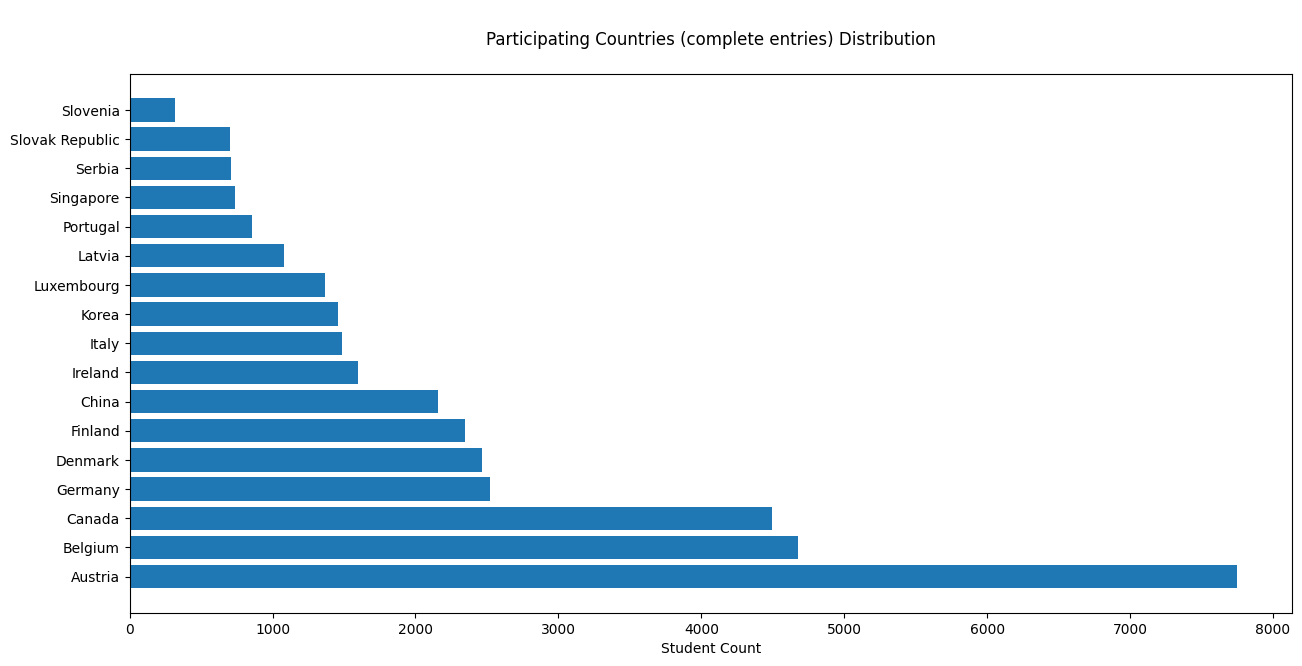

In [ ]:
plt.figure(figsize=[15,7])
plt.title('\nParticipating Countries (complete entries) Distribution\n')
plt.barh(data=df_student, y=df_student.country.unique(), width=df_student.country.value_counts())
plt.xlabel('Student Count');


##### Observation:
Top 6 countries that have more than 3x of lower 28 countries are `Albania`, `United Arab Emirates`, `Argentina`, `Australia`, `Austria`, `Belgium`.

#### Question #3: How are test languages distributed?
#### Visualization:

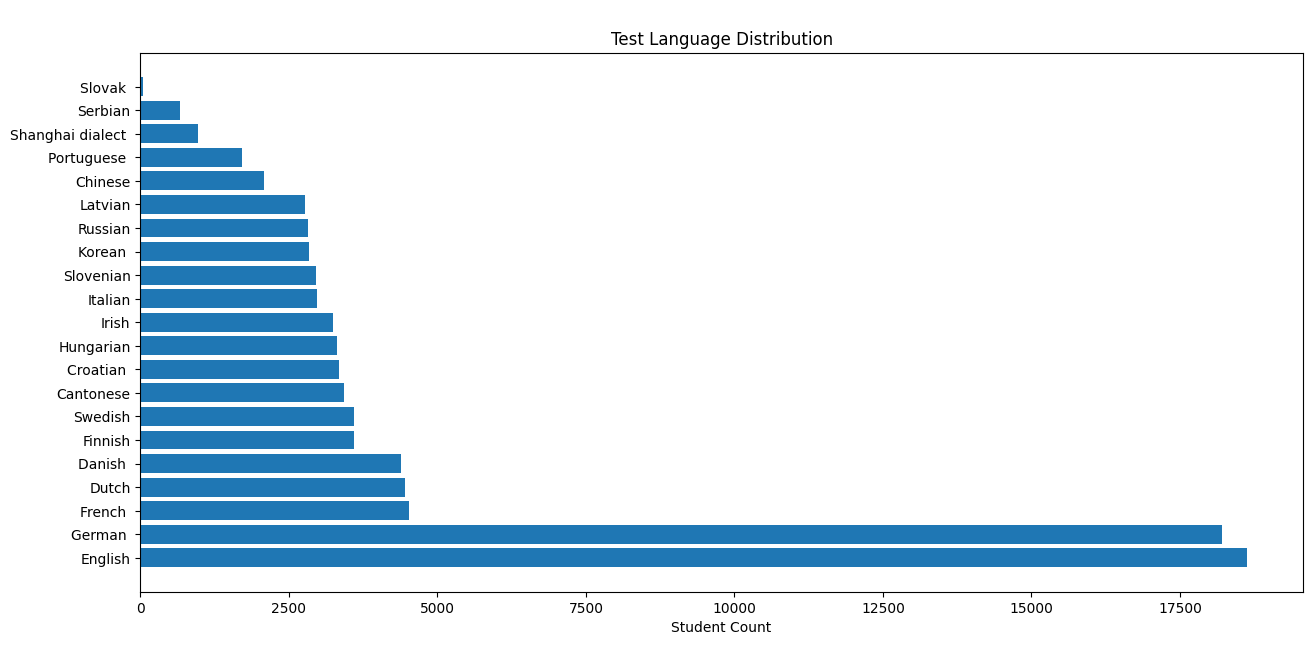

In [ ]:
# plotting test language from df_school
plt.figure(figsize=[15,7])
plt.title('\nTest Language Distribution')
plt.barh(data = df_school, y= df_school.test_language.unique(), width=df_school.test_language.value_counts())
plt.xlabel('Student Count')
plt.show()

#### Observation:
The most common test languages are English and German, just above 17500 students.

#### Question #4: How is wealth tendency distributed among students?
#### Visualization:

Text(0, 0.5, 'Student Count')

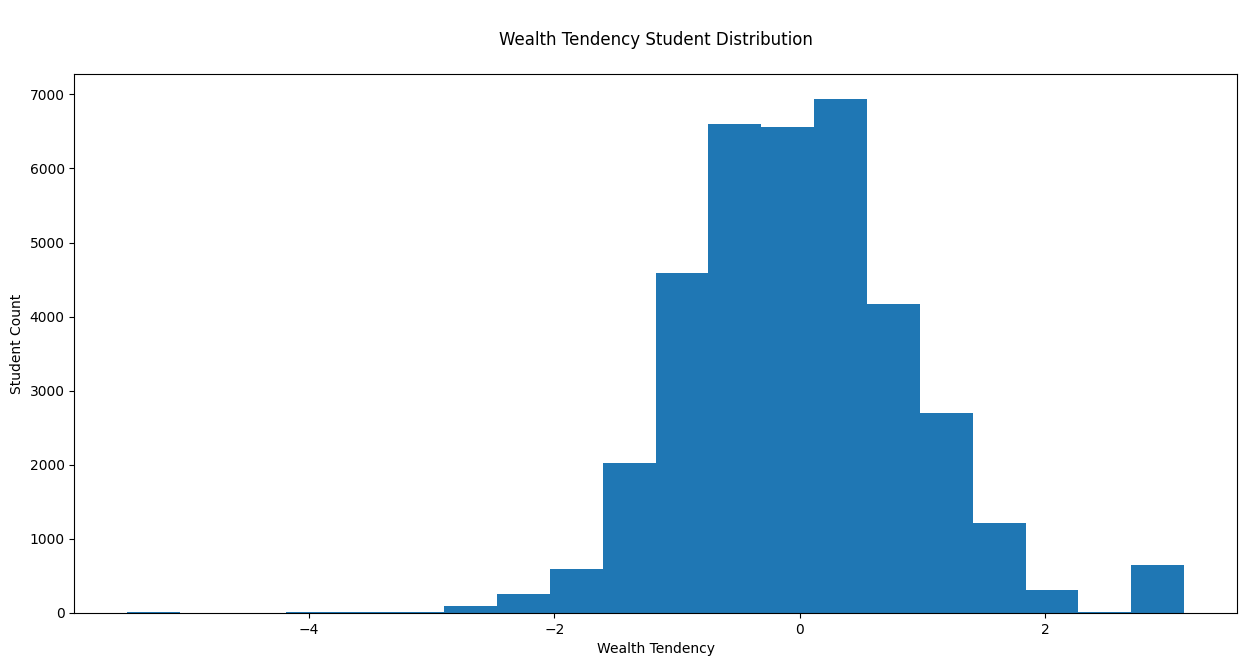

In [ ]:
#plotting df_student wealth

plt.figure(figsize=[15,7])
plt.title('\nWealth Tendency Student Distribution\n')
plt.hist(data=df_student, x='wealth', bins=20)
plt.xlabel('Wealth Tendency')
plt.ylabel('Student Count')




#### Observation:
With the exception of few outliers on the lower end of the histogram, the distribution also seems close to normal. The wealth tendency at 0 means that the student is neither poor nor rich.

#### Question #5: How many females vs males in the df_student?
#### Visualization:


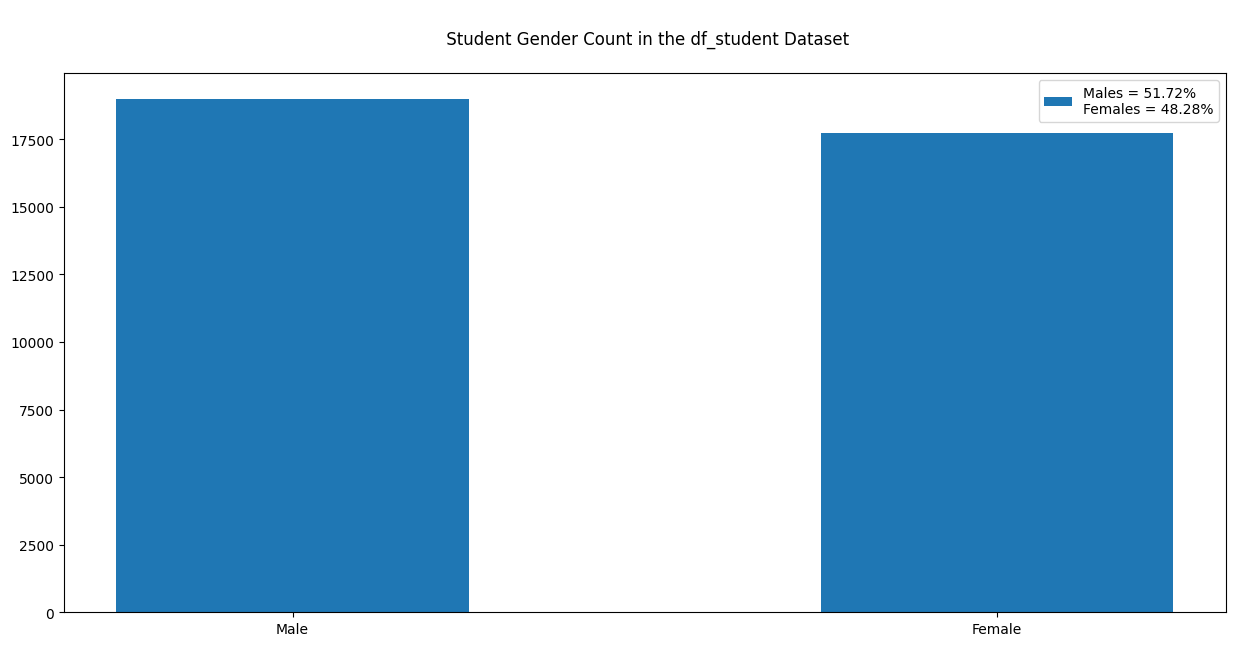

In [ ]:
plt.figure(figsize=[15,7])
plt.bar(data = df_student, x= df_student.gender.unique(), height=df_student.gender.value_counts(), width=0.5)
plt.title('\n Student Gender Count in the df_student Dataset\n ')


male_pct = df_student.gender.value_counts()[0]/df_student.gender.value_counts().sum()
female_pct = df_student.gender.value_counts()[1]/df_student.gender.value_counts().sum()
plt.legend([f'Males = {male_pct*100:.2f}%\nFemales = {female_pct*100:.2f}%'])
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There was no transformations required on the previewed features. The distributions were not skewed in these previews so no logarithimic transformation was necessary. 
- There is no significant disparity between female student count and male student count.
- The wealth tendency is normally distributed around -2 to +2 with the mean around 0, with negligible outliers on the lower end -4, and outliers on the right end at +3.
- English and German were the most common test langauge.
- Science, Math, Reading scores were normally distributed, with slight shift of the mean increasing by 30 points in `df_OOS` and `df_school`.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distributions were usual and normally distributed. However, due to significant amount of missing data, I decided to drop missing values from each observation and only retain entries with complete data.

Since my cleaning decision to drop entries with missing values, my main concern was the `score_math`, `score_reading` and `score_science` would remain normally distributed and with minimal mean shift. I plotted the scores data from `df_pisa` along with scores remaining in `df_student`, `df_OOS` and `df_school` to observe the changes in distributions of the scores against that of main data frame `df_pisa`. The shift was slightly more significant in `df_school` and `df_OOS` in comparison to the original dataframe `df_pisa`.
The `df_student` was the closest to the mean of scores of `df_pisa`, while `df_OOS` and `df_school` were off by +49 points max from `df_pisa`. This is acceptable since it's lesser than half of standard deviation of `df_pisa` mean scores.

## Bivariate Exploration <a class='anchor' id ='bivariate-exploration'></a>


##### Question #6: How are scored distributed among the two genders?

##### Visualization:

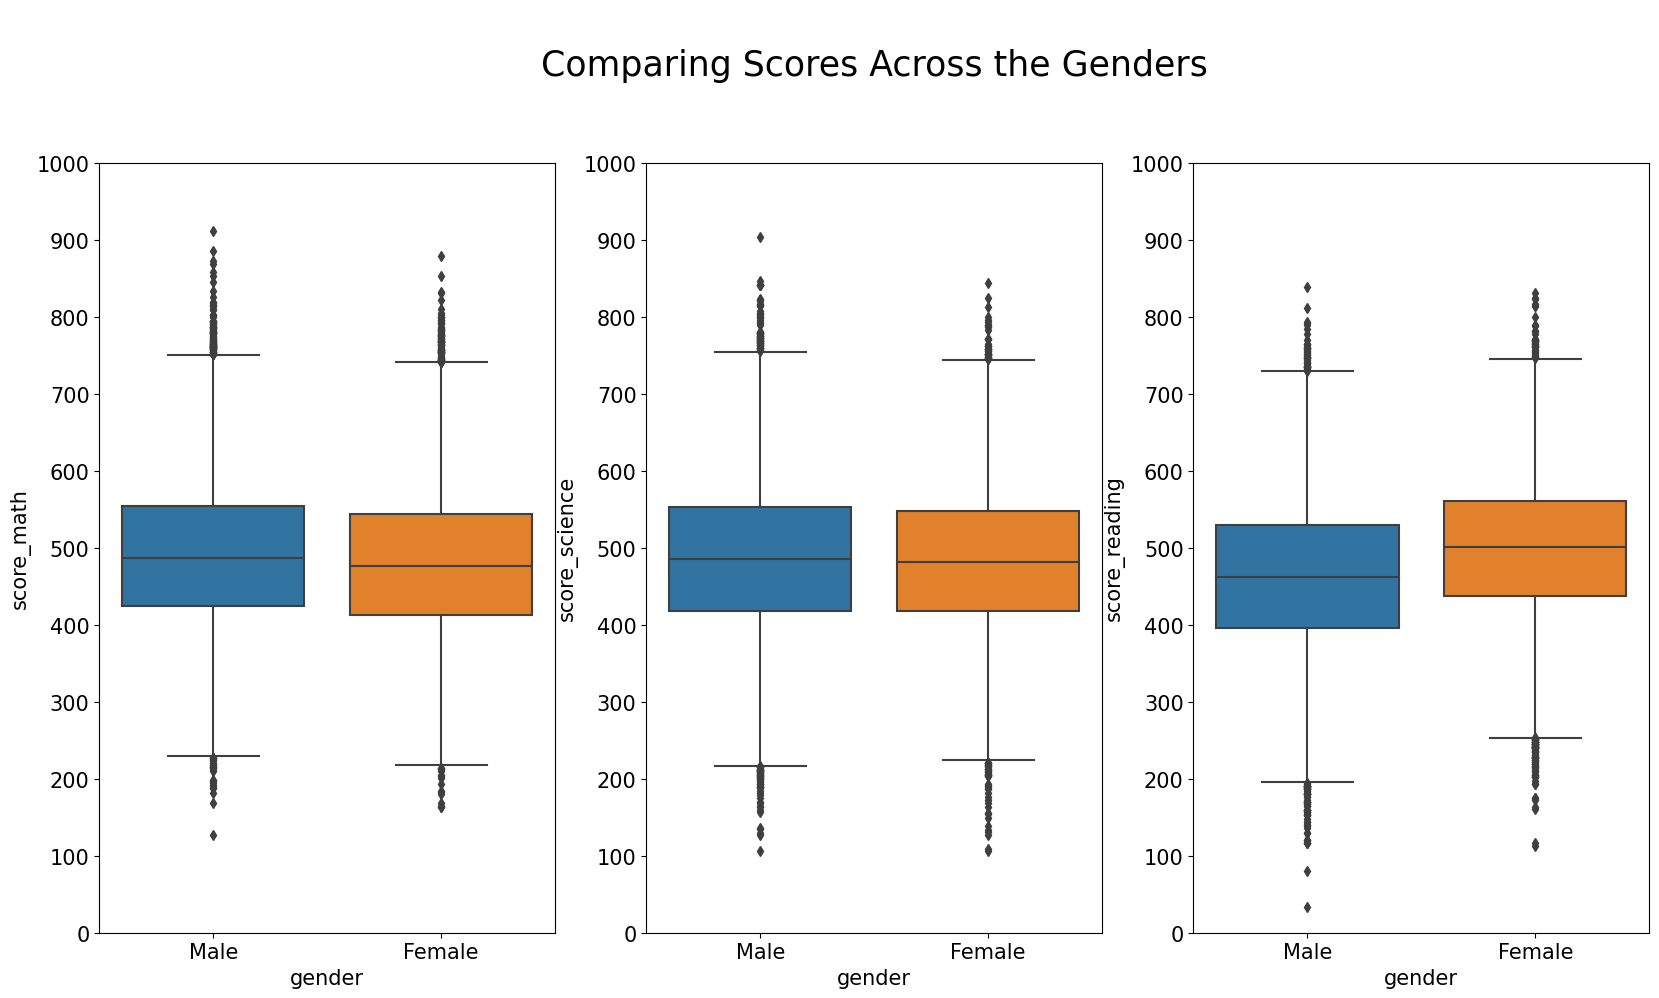

In [41]:
plt.rc('axes', titlesize=25)        # Controls Axes Title
plt.rc('axes', labelsize=15)        # Controls Axes Labels
plt.rc('xtick', labelsize=15)       # Controls x Tick Labels
plt.rc('ytick', labelsize=15)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title

plt.figure(2, figsize=(20,10));
plt.grid(visible = True);

cols = ['score_math','score_science','score_reading']
for i in range(1,4):
    plt.subplot(1,3,i);
    if i == 2:
        plt.title('\n Comparing Scores Across the Genders \n \n')
    plt.ylim(0,1000)
    plt.yticks(range(0,1100,100))
    ab = sb.boxplot(data=df_student, x=df_student.gender,y= cols[i-1]);

plt.show();


#### Observation:

The difference in `score_math` and `score_science` were similar in both genders. On the other hand, the `score_reading` mean for females were higher than those of males.


#### Question #7: How does the `age_start_learning` compare among the scores?
#### Visualization:

In [42]:
order = ['0 to 3 years', '4 to 6 years', '7 to 9 years', '10 to 12 years', '13 years or older']
df_student.age_start_learning = pd.Categorical(df_student.age_start_learning, categories=order, ordered=True)

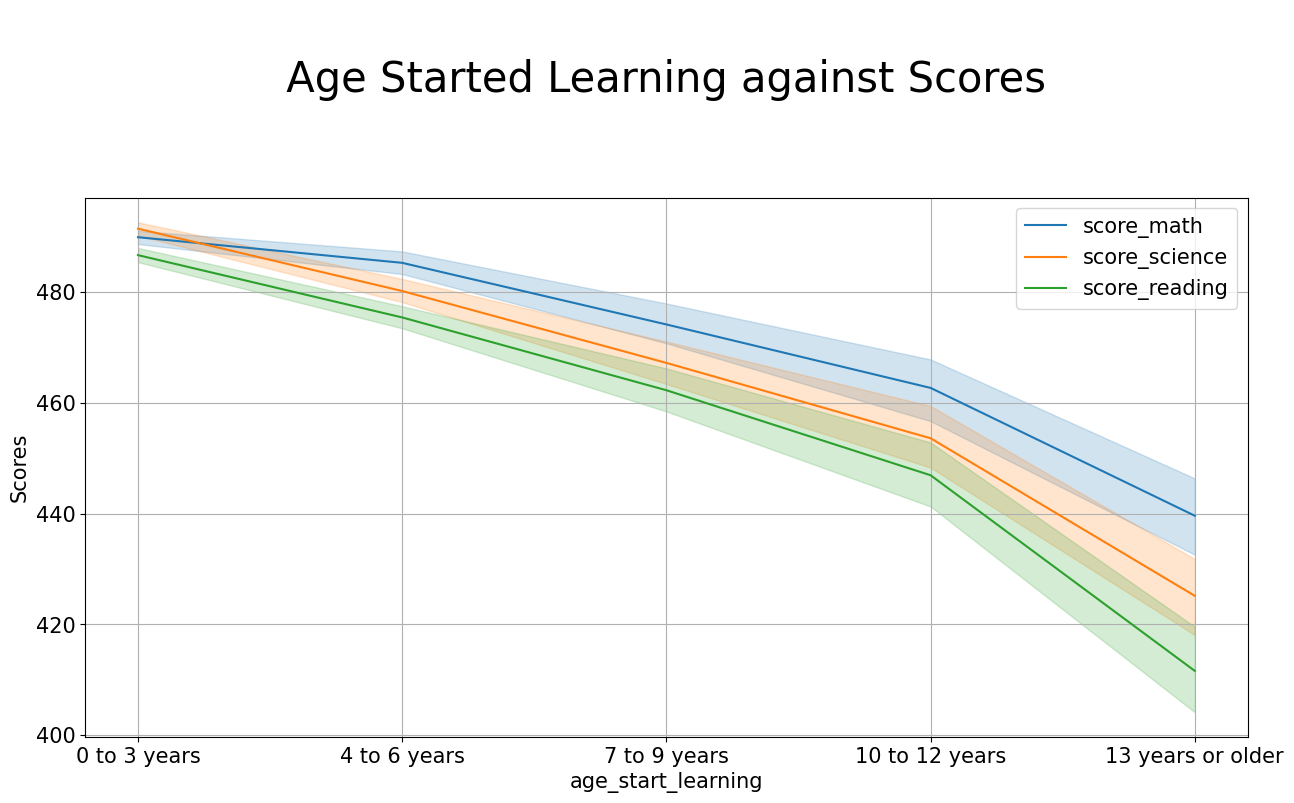

In [43]:
plt.rc('axes', titlesize=30)        # Controls Axes Title
plt.rc('axes', labelsize=15)        # Controls Axes Labels
plt.rc('xtick', labelsize=15)       # Controls x Tick Labels
plt.rc('ytick', labelsize=15)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title

plt.figure(2, figsize=(15,7));
plt.grid(visible = True);

cols = ['score_math','score_science','score_reading']
plt.title('\n Age Started Learning against Scores \n \n')

sb.lineplot(data=df_student, x=df_student.age_start_learning,y= cols[0], label= cols[0], legend="full");
sb.lineplot(data=df_student, x=df_student.age_start_learning,y= cols[1], label= cols[1], legend="full");
sb.lineplot(data=df_student, x=df_student.age_start_learning,y= cols[2], label= cols[2], legend="full");
plt.ylabel('Scores')
plt.show()




#### Observation:

The later the student starts learning the lower their scores in all 3 categories.

#### Question #8: How does study time compare among the scores?
#### Visualization:

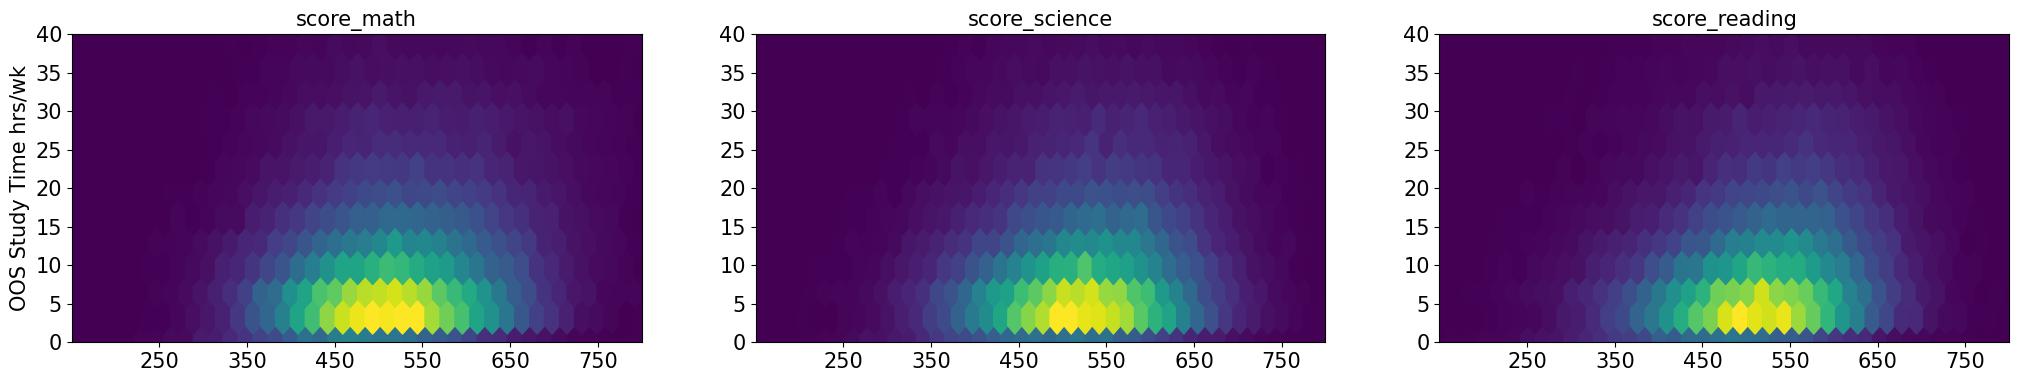

In [44]:
plt.rc('axes', titlesize=15)        # Controls Axes Title
plt.rc('axes', labelsize=15)        # Controls Axes Labels
plt.rc('xtick', labelsize=15)       # Controls x Tick Labels
plt.rc('ytick', labelsize=15)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title

plt.figure(figsize=(25,4))
plt.grid(visible = True);
cols = ['score_math','score_science','score_reading']
for i in range(1,4):
    plt.subplot(1,3,i);
    if i == 1:
        plt.ylabel('OOS Study Time hrs/wk')
    plt.hexbin(data=df_OOS, y='OOS_study_time', x=cols[i-1], gridsize=50)
    plt.xlim(150,800)
    plt.ylim(0,25)
    plt.yticks(range(0,45,5))
    plt.xticks(range(250,850,100))
    plt.title(cols[i-1])




#### Observation:
Most students who studied for 5-10 hours a week scored between 500-550 in maths, reading and science.

#### Question #9: How do scores compare to time playing games?
#### Visualization:

In [45]:
df_OOS.OOS_multi_player_games.unique()

array(['Never or hardly ever', 'Once or twice a month', 'Every day',
       'Once or twice a week', 'Almost every day'], dtype=object)

In [46]:
order  = ['Never or hardly ever', 'Once or twice a month', 
       'Once or twice a week','Almost every day', 'Every day']

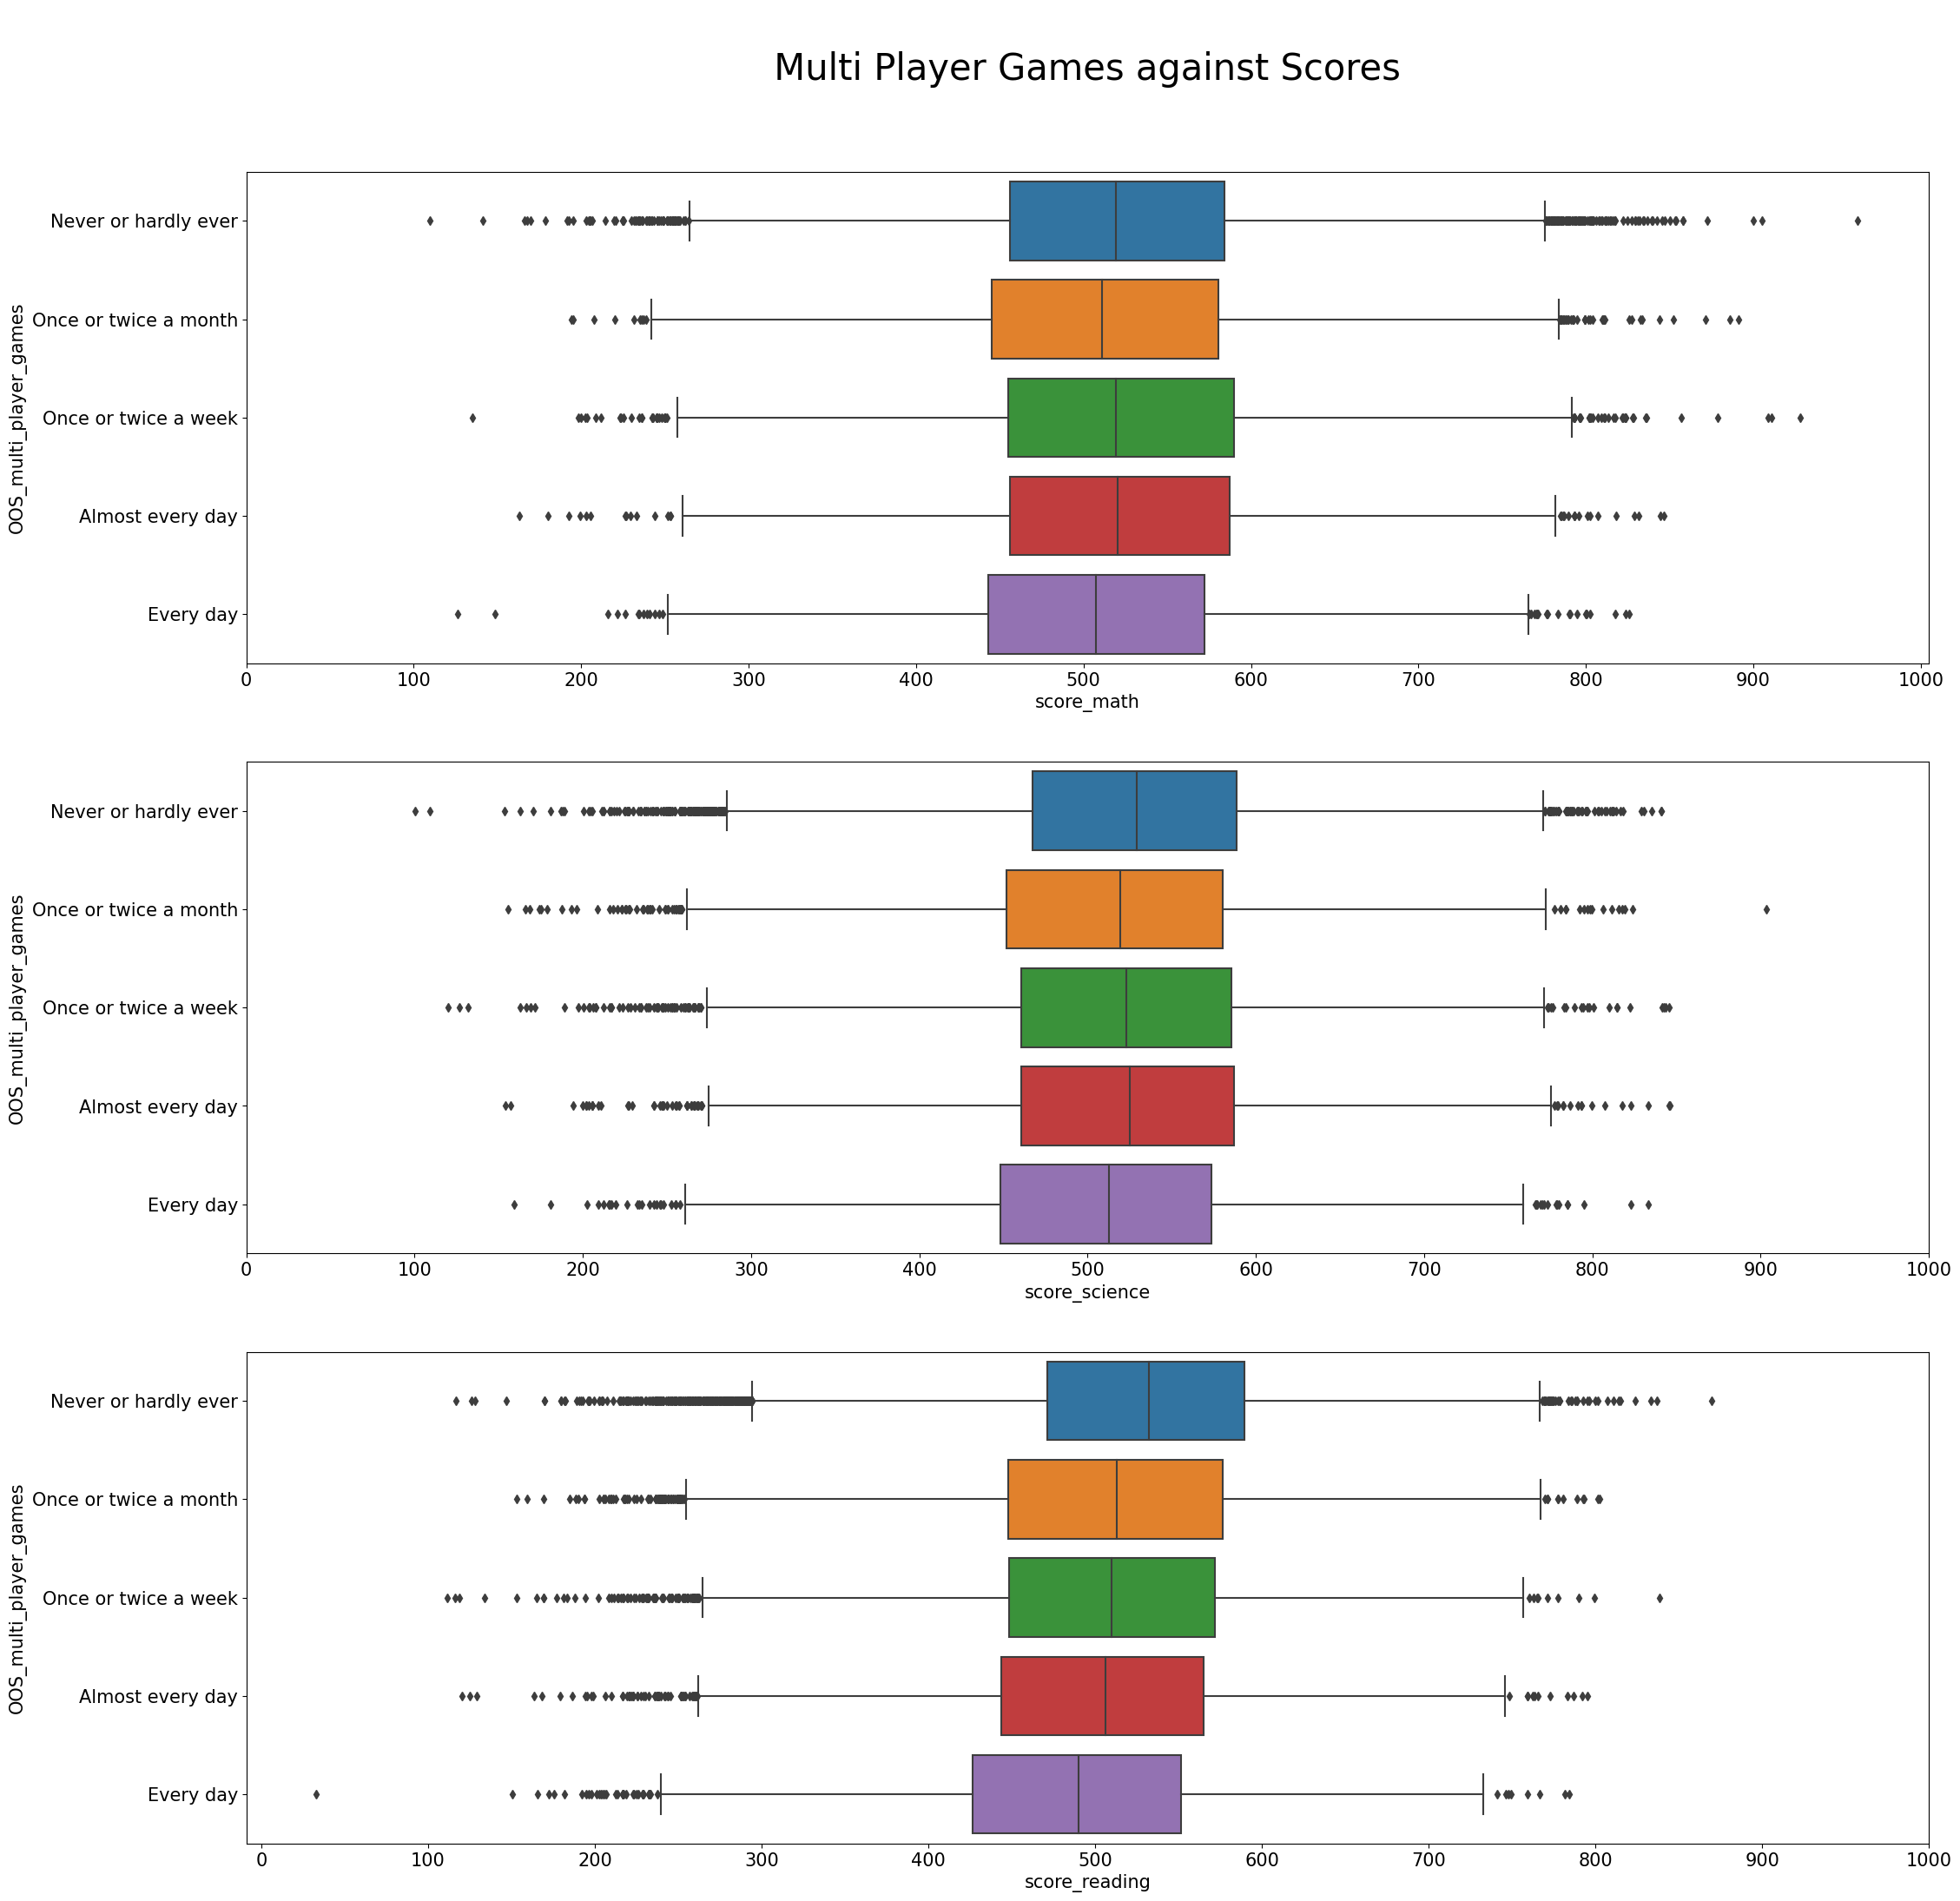

In [47]:
plt.rc('axes', titlesize=30)        # Controls Axes Title
plt.rc('axes', labelsize=15)        # Controls Axes Labels
plt.rc('xtick', labelsize=15)       # Controls x Tick Labels
plt.rc('ytick', labelsize=15)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title

plt.figure(3,figsize=(25,25))
plt.grid(visible = True);
cols = ['score_math','score_science','score_reading']
for i in range(1,4):
    plt.subplot(3,1,i);
    if i == 1:
        plt.title('\n Multi Player Games against Scores \n \n')
    sb.boxplot(data=df_OOS, y='OOS_multi_player_games', x=cols[i-1], order=order)
    plt.xticks(range(0,1100,100))



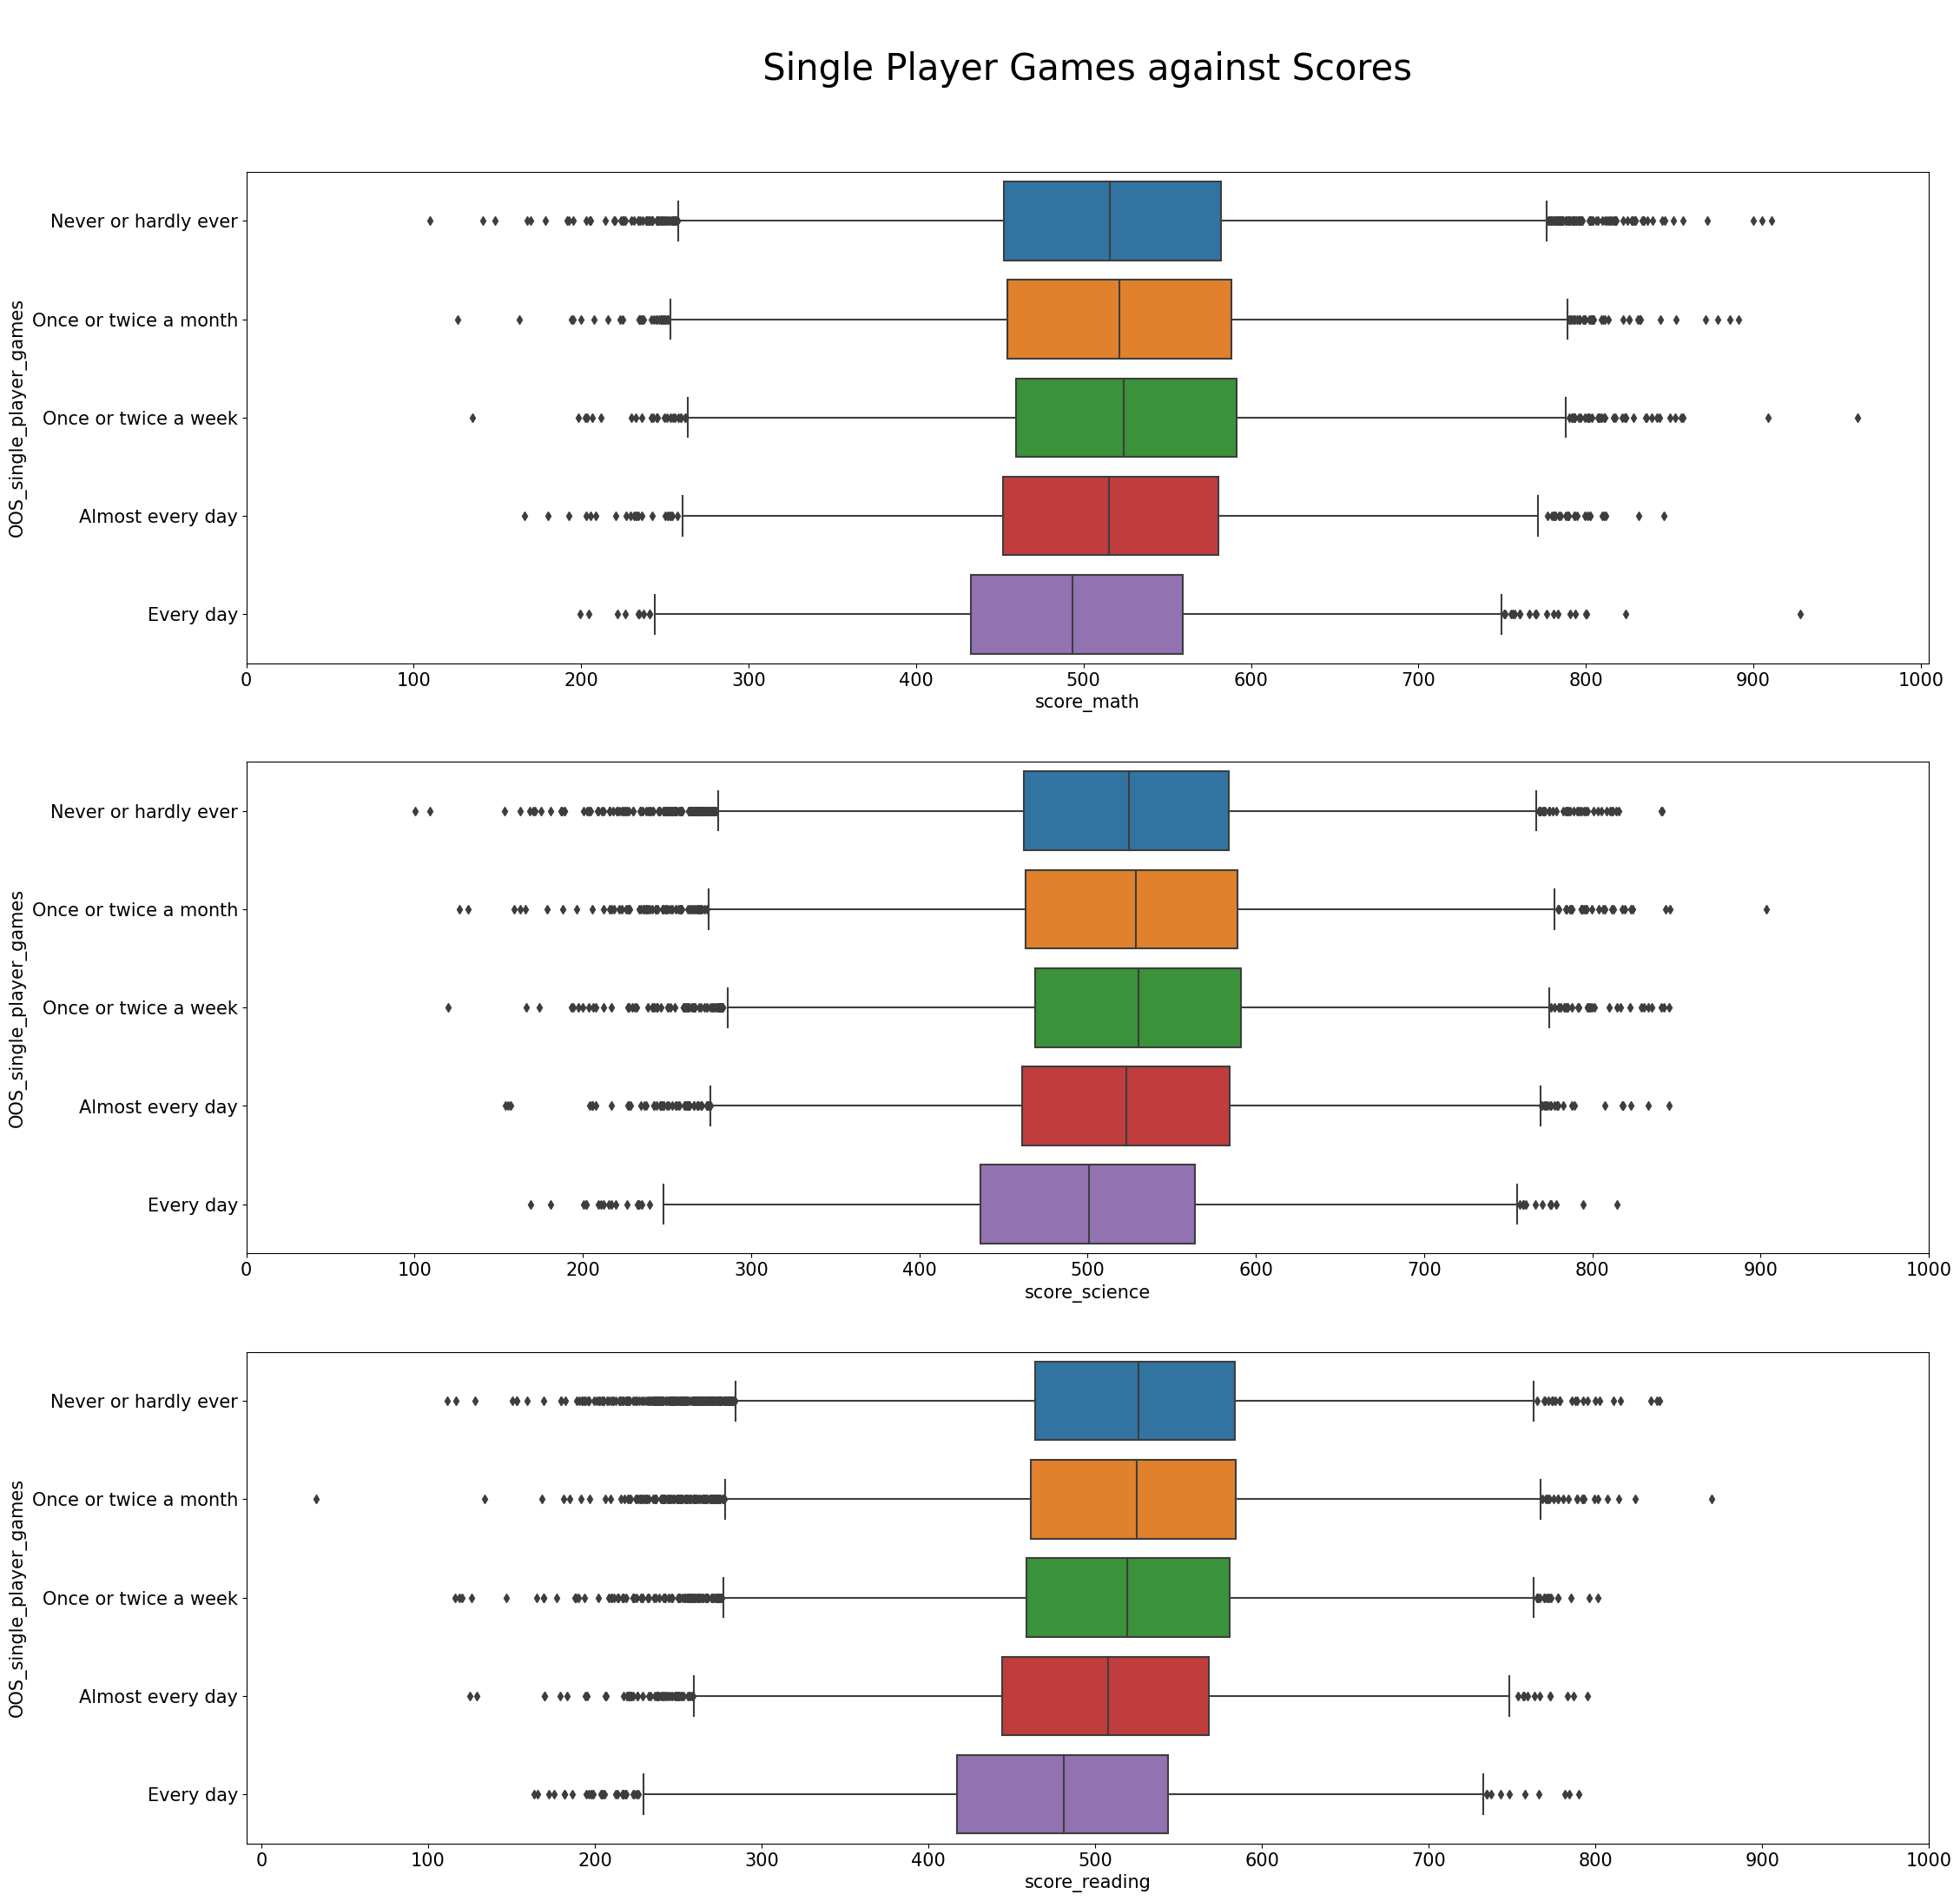

In [48]:
plt.rc('axes', titlesize=30)        # Controls Axes Title
plt.rc('axes', labelsize=15)        # Controls Axes Labels
plt.rc('xtick', labelsize=15)       # Controls x Tick Labels
plt.rc('ytick', labelsize=15)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title

plt.figure(3,figsize=(25,25))
plt.grid(visible = True);
cols = ['score_math','score_science','score_reading']
for i in range(1,4):
    plt.subplot(3,1,i);
    if i == 1:
        plt.title('\n Single Player Games against Scores \n \n')
    sb.boxplot(data=df_OOS, y='OOS_single_player_games', x=cols[i-1], order=order)
    plt.xticks(range(0,1100,100))

#### Observation:
Students who played games everyday had least mean scores in all scores, most significantly in reading scores.

#### Question #10: How does computer use time compare to scores?
#### Visualization:


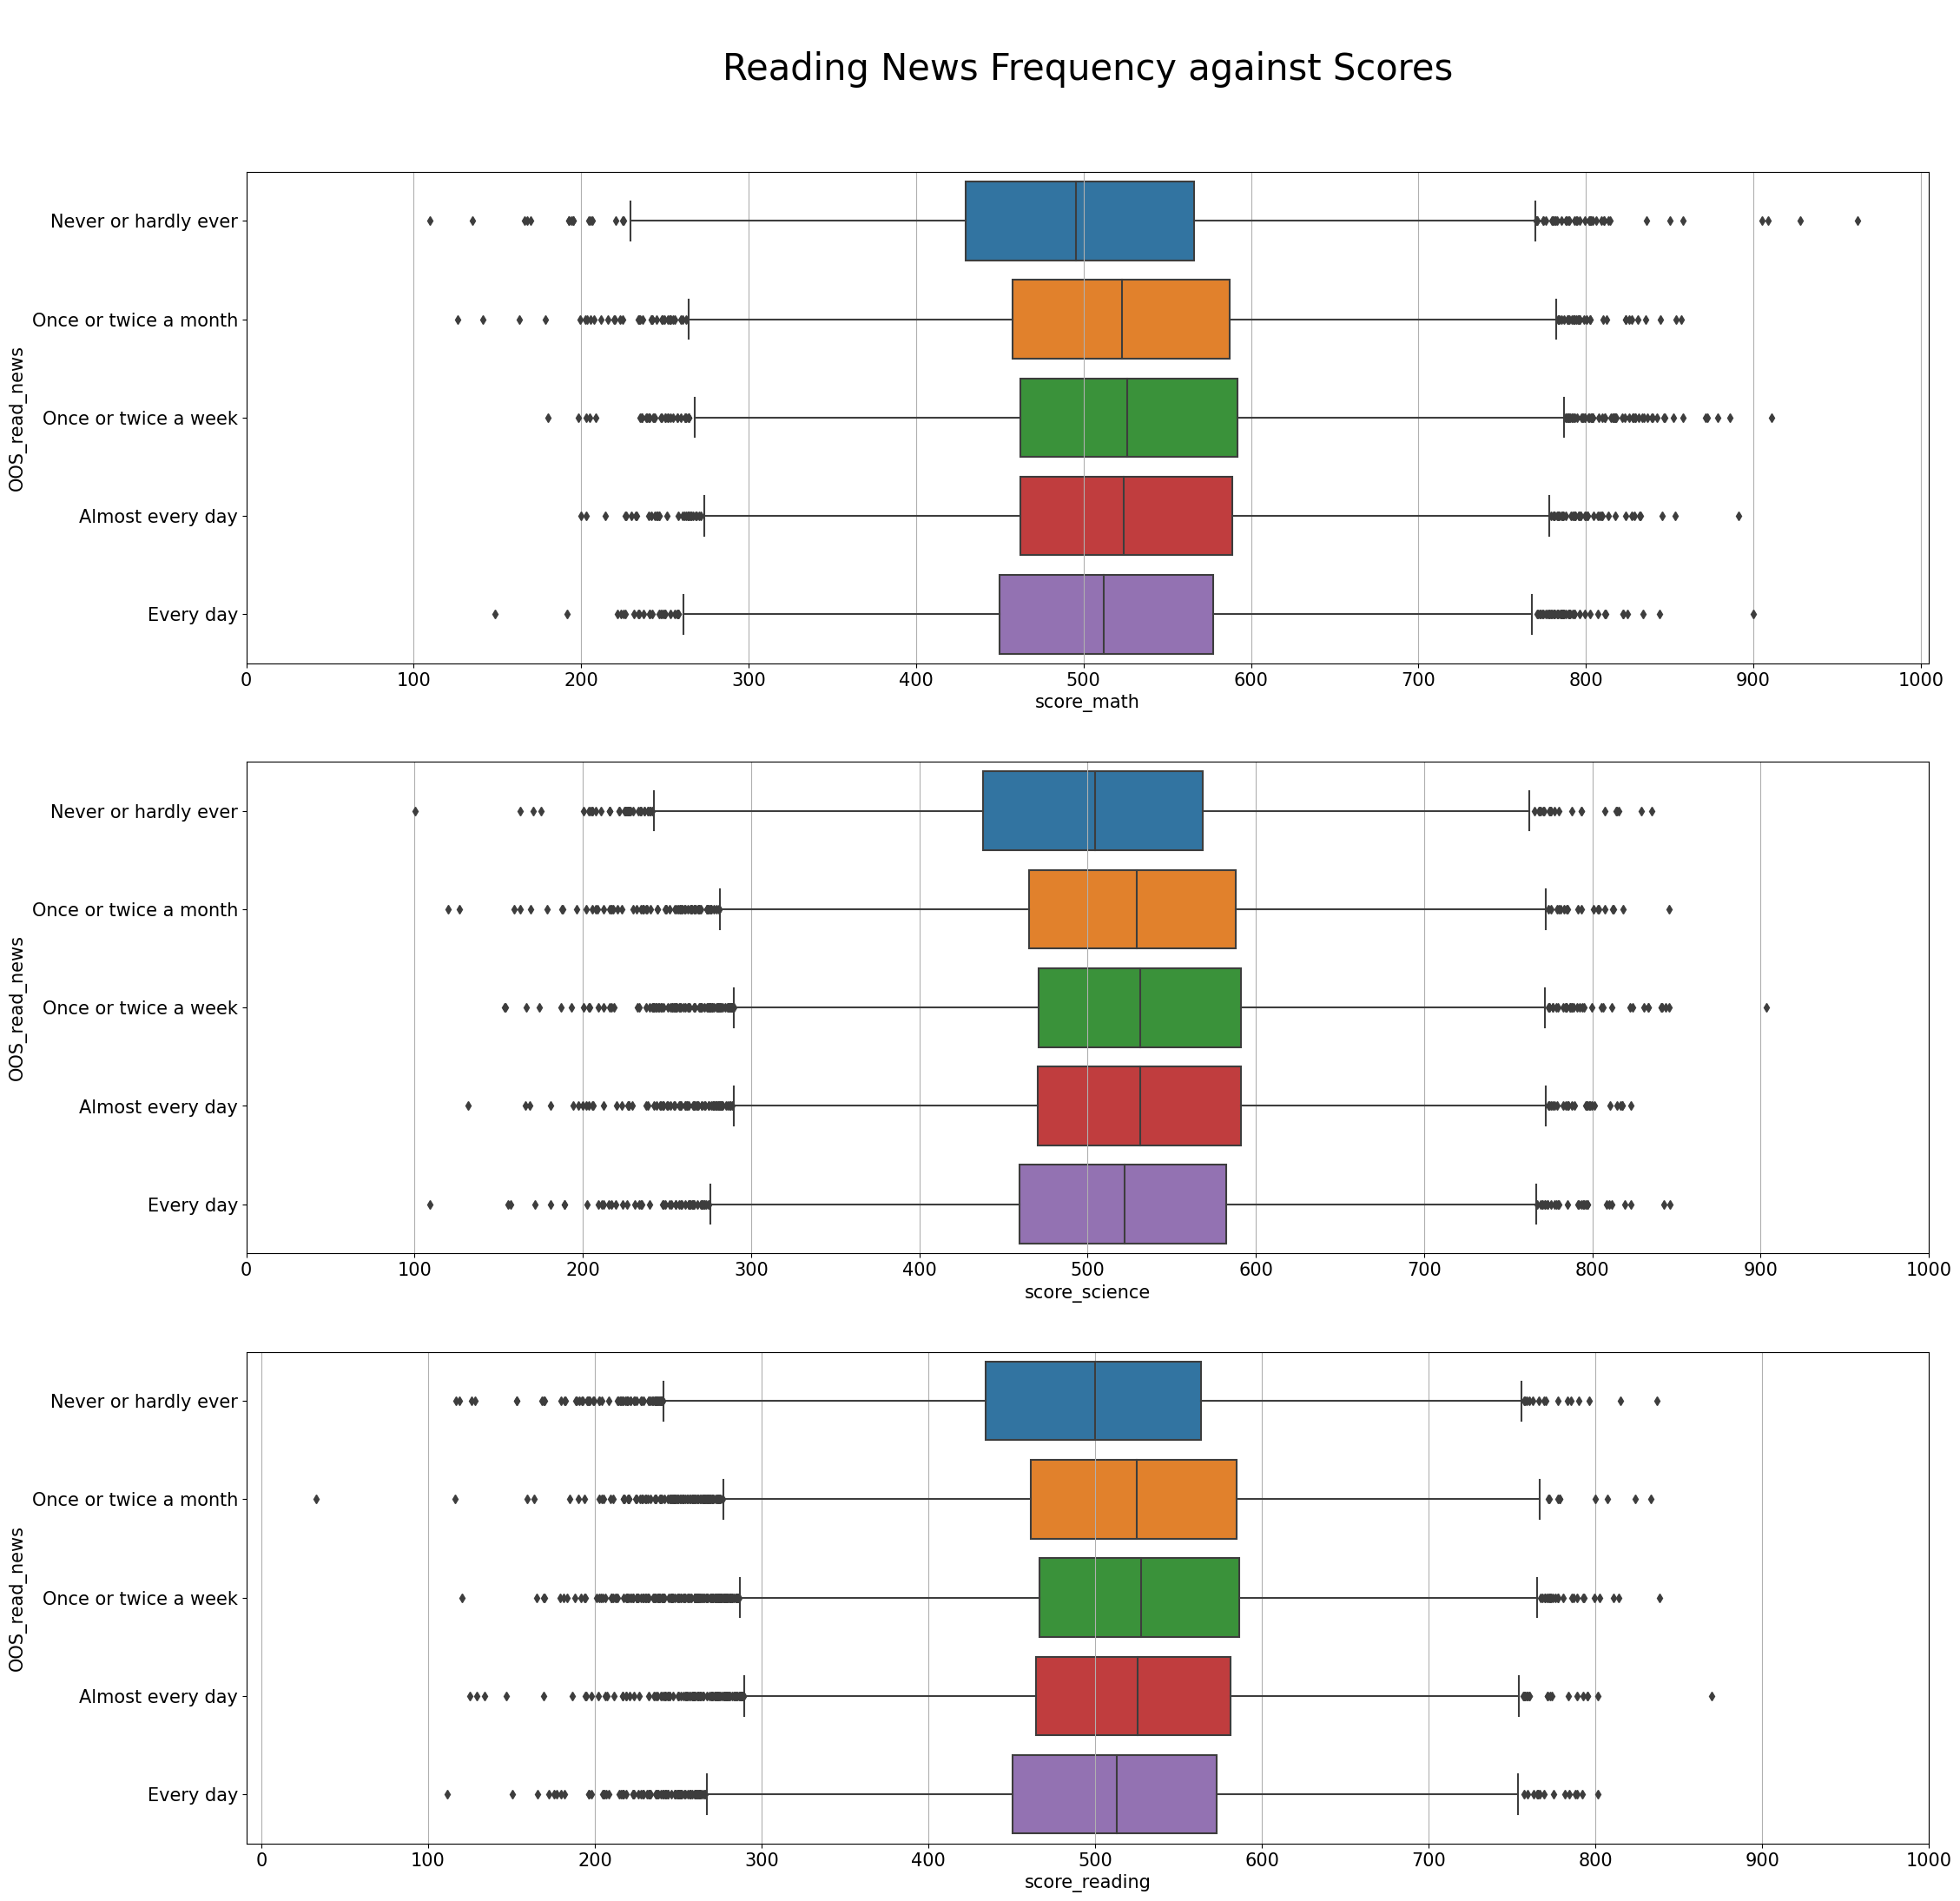

In [49]:
plt.rc('axes', titlesize=30)        # Controls Axes Title
plt.rc('axes', labelsize=15)        # Controls Axes Labels
plt.rc('xtick', labelsize=15)       # Controls x Tick Labels
plt.rc('ytick', labelsize=15)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title

plt.figure(3,figsize=(25,25))

cols = ['score_math','score_science','score_reading']
for i in range(1,4):
    plt.subplot(3,1,i);
    plt.grid(visible = True);
    if i == 1:
        plt.title('\nReading News Frequency against Scores\n \n')
    sb.boxplot(data=df_OOS, y='OOS_read_news', x=cols[i-1], order = order)
    # plt.xlim(150,800)
    # plt.ylim(0,10)
    # plt.yticks(range(0,30,1))
    plt.xticks(range(0,1100,100))
    # plt.title(cols[i-1])

#### Observation:
Students who read the news once or twice a week had higher mean scores in all subjects.

#### Question #11: How does time spent on social media affect the scores?
#### Visualization:

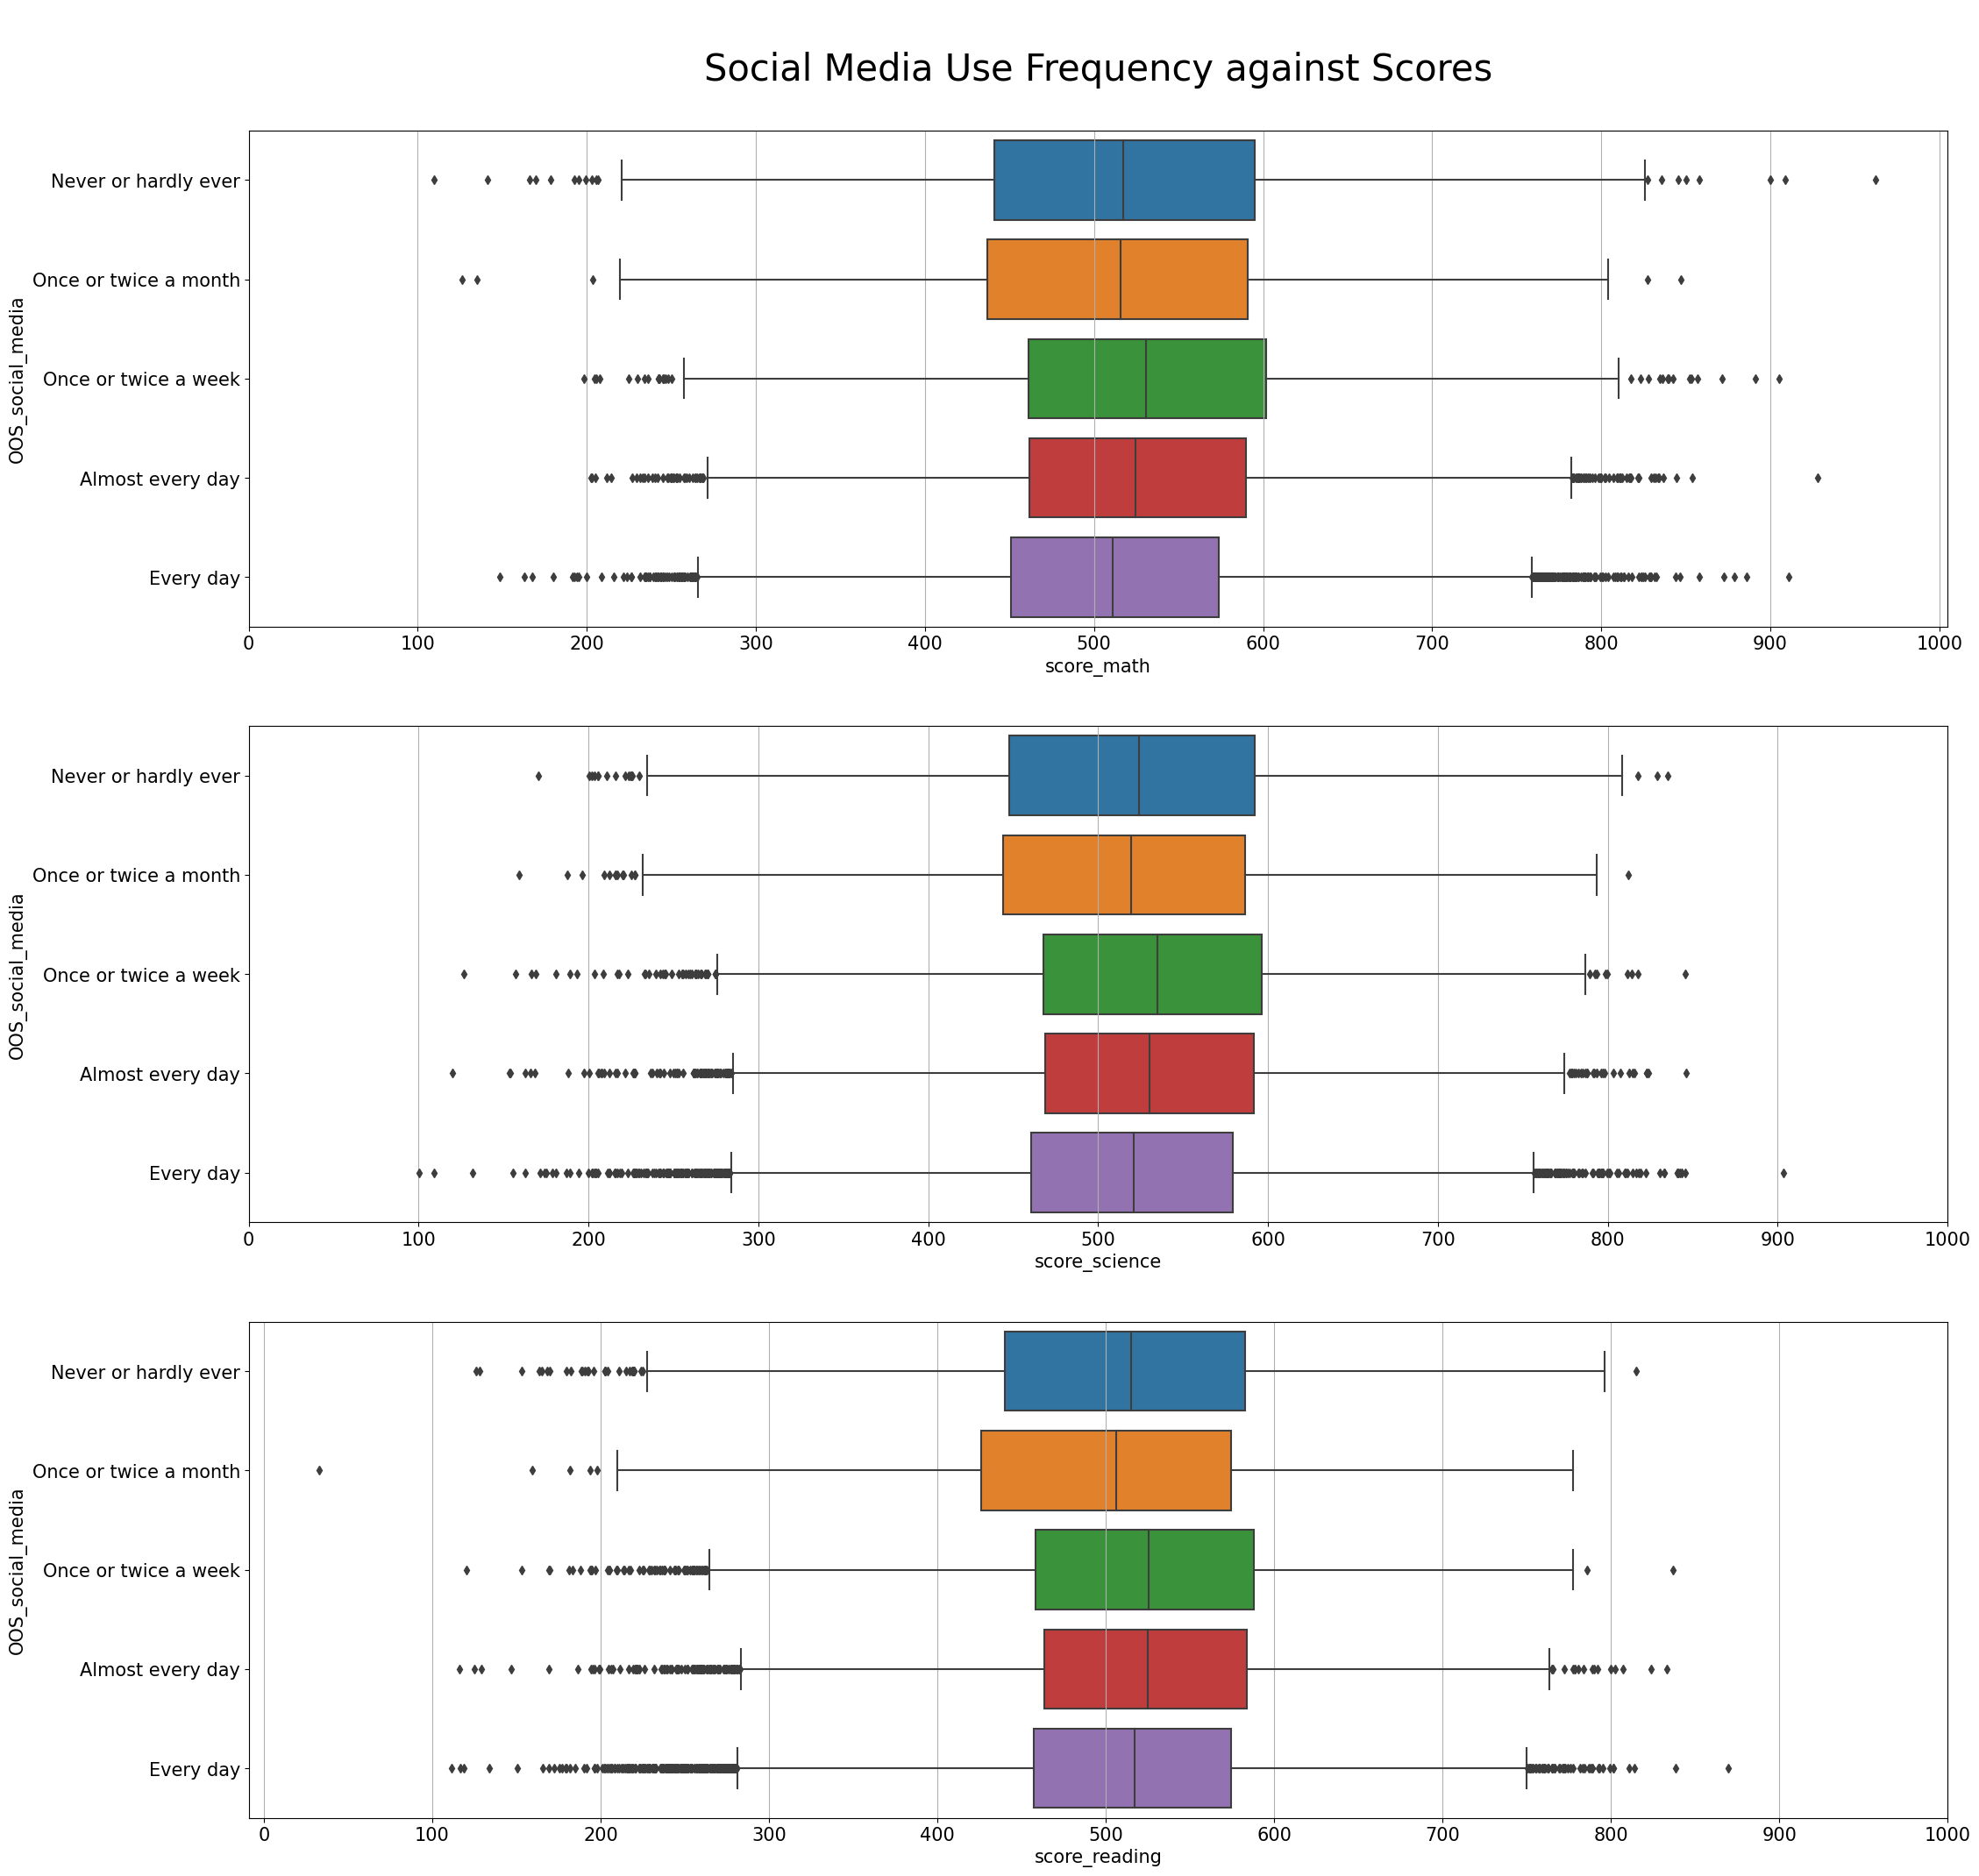

In [50]:
plt.rc('axes', titlesize=30)        # Controls Axes Title
plt.rc('axes', labelsize=15)        # Controls Axes Labels
plt.rc('xtick', labelsize=15)       # Controls x Tick Labels
plt.rc('ytick', labelsize=15)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title

plt.figure(3,figsize=(25,25))


cols = ['score_math','score_science','score_reading']
for i in range(1,4):
    plt.subplot(3,1,i);
    plt.grid(visible = True);
    
    if i == 1:
        plt.title('\nSocial Media Use Frequency against Scores\n')
    sb.boxplot(data=df_OOS, y='OOS_social_media', x=cols[i-1], order = order)

    plt.xticks(range(0,1100,100))
    # plt.title(cols[i-1])

#### Observation:
The students who used social media once or twice a week had higher scores on vaerage.

#### Question #12: How wealth correlate to age start learning?
#### Visualization:

In [51]:
df_school.finance_knowledge_at_school.unique()

array([2., 1.])

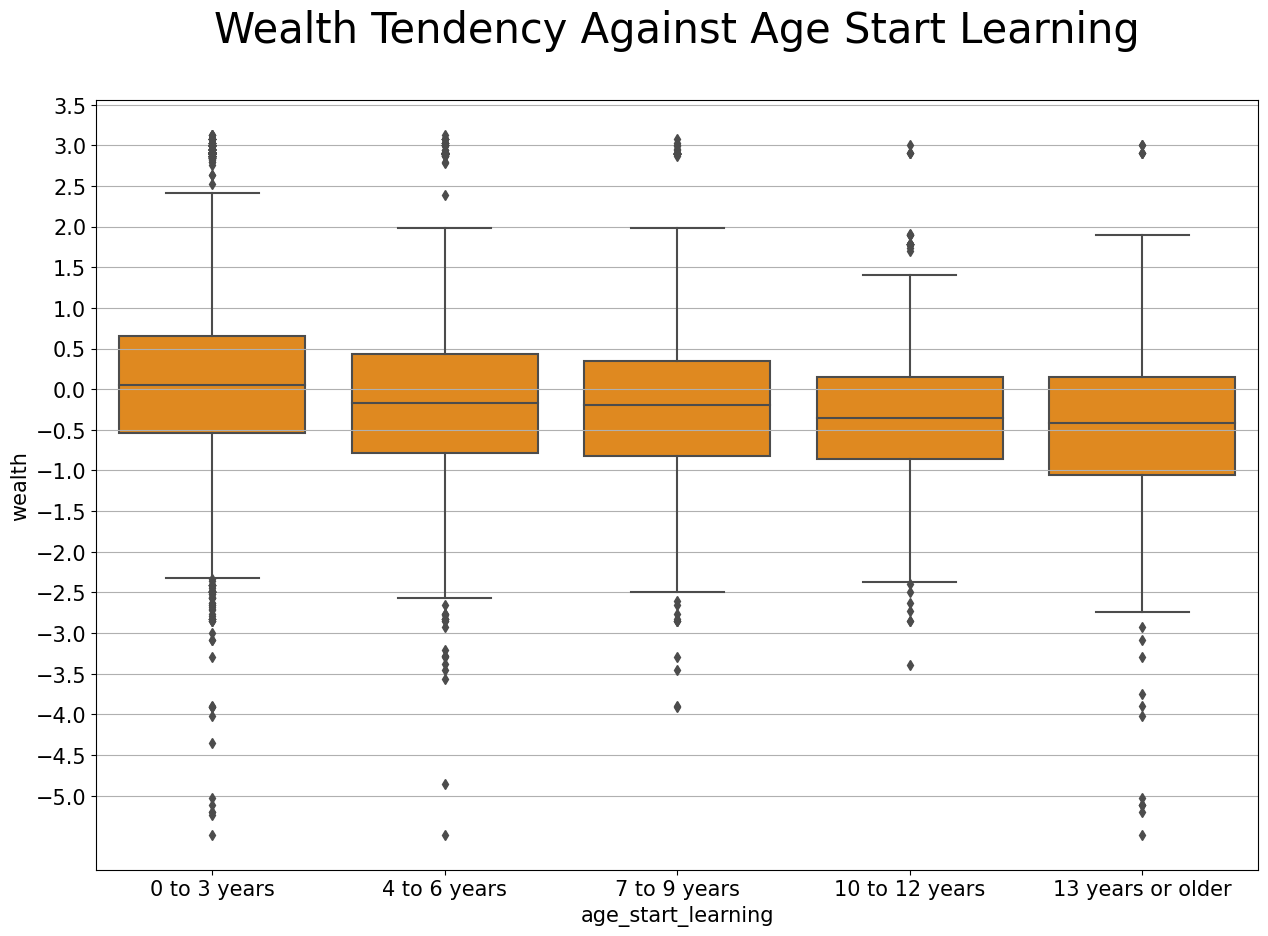

In [57]:
plt.rc('axes', titlesize=30)        # Controls Axes Title
plt.rc('axes', labelsize=15)        # Controls Axes Labels
plt.rc('xtick', labelsize=15)       # Controls x Tick Labels
plt.rc('ytick', labelsize=15)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title

plt.figure(figsize=(15,10))
plt.yticks([0.5*x for x in range(-10,10,1)])
plt.grid(visible = True);
plt.title('Wealth Tendency Against Age Start Learning\n')
sb.boxplot(y= df_student.wealth, x= df_student.age_start_learning, color = "darkorange" )

plt.show()

#### Observation:
There is a slight significance that students who are wealthy are more likely to start learning at an early age.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The summary of findings are as followed:
- Among the two genders, the Female students showed higher average scores in reading.
- Students who started learning at 0-3 years had highest avergae scores in all subjects. Scores declined the later age the students start learning.
- Students who played everyday scored less on average on all subjects.
- Students who read news once or twice a week had higher scores on avergae on all subjects.
- Students who used social media once or twice a week scored slightly higher on average.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- There is a slight correlation between Wealth tendency and age start learning. The average students who started learning at the age 0-3 were slightly higher on wealth tendency than the rest age groups.

## Multivariate Exploration <a class='anchor' id ='multivariate-exploration'></a>

#### Question #13: Gender vs Age Started Learning vs Scores

#### Visualization:

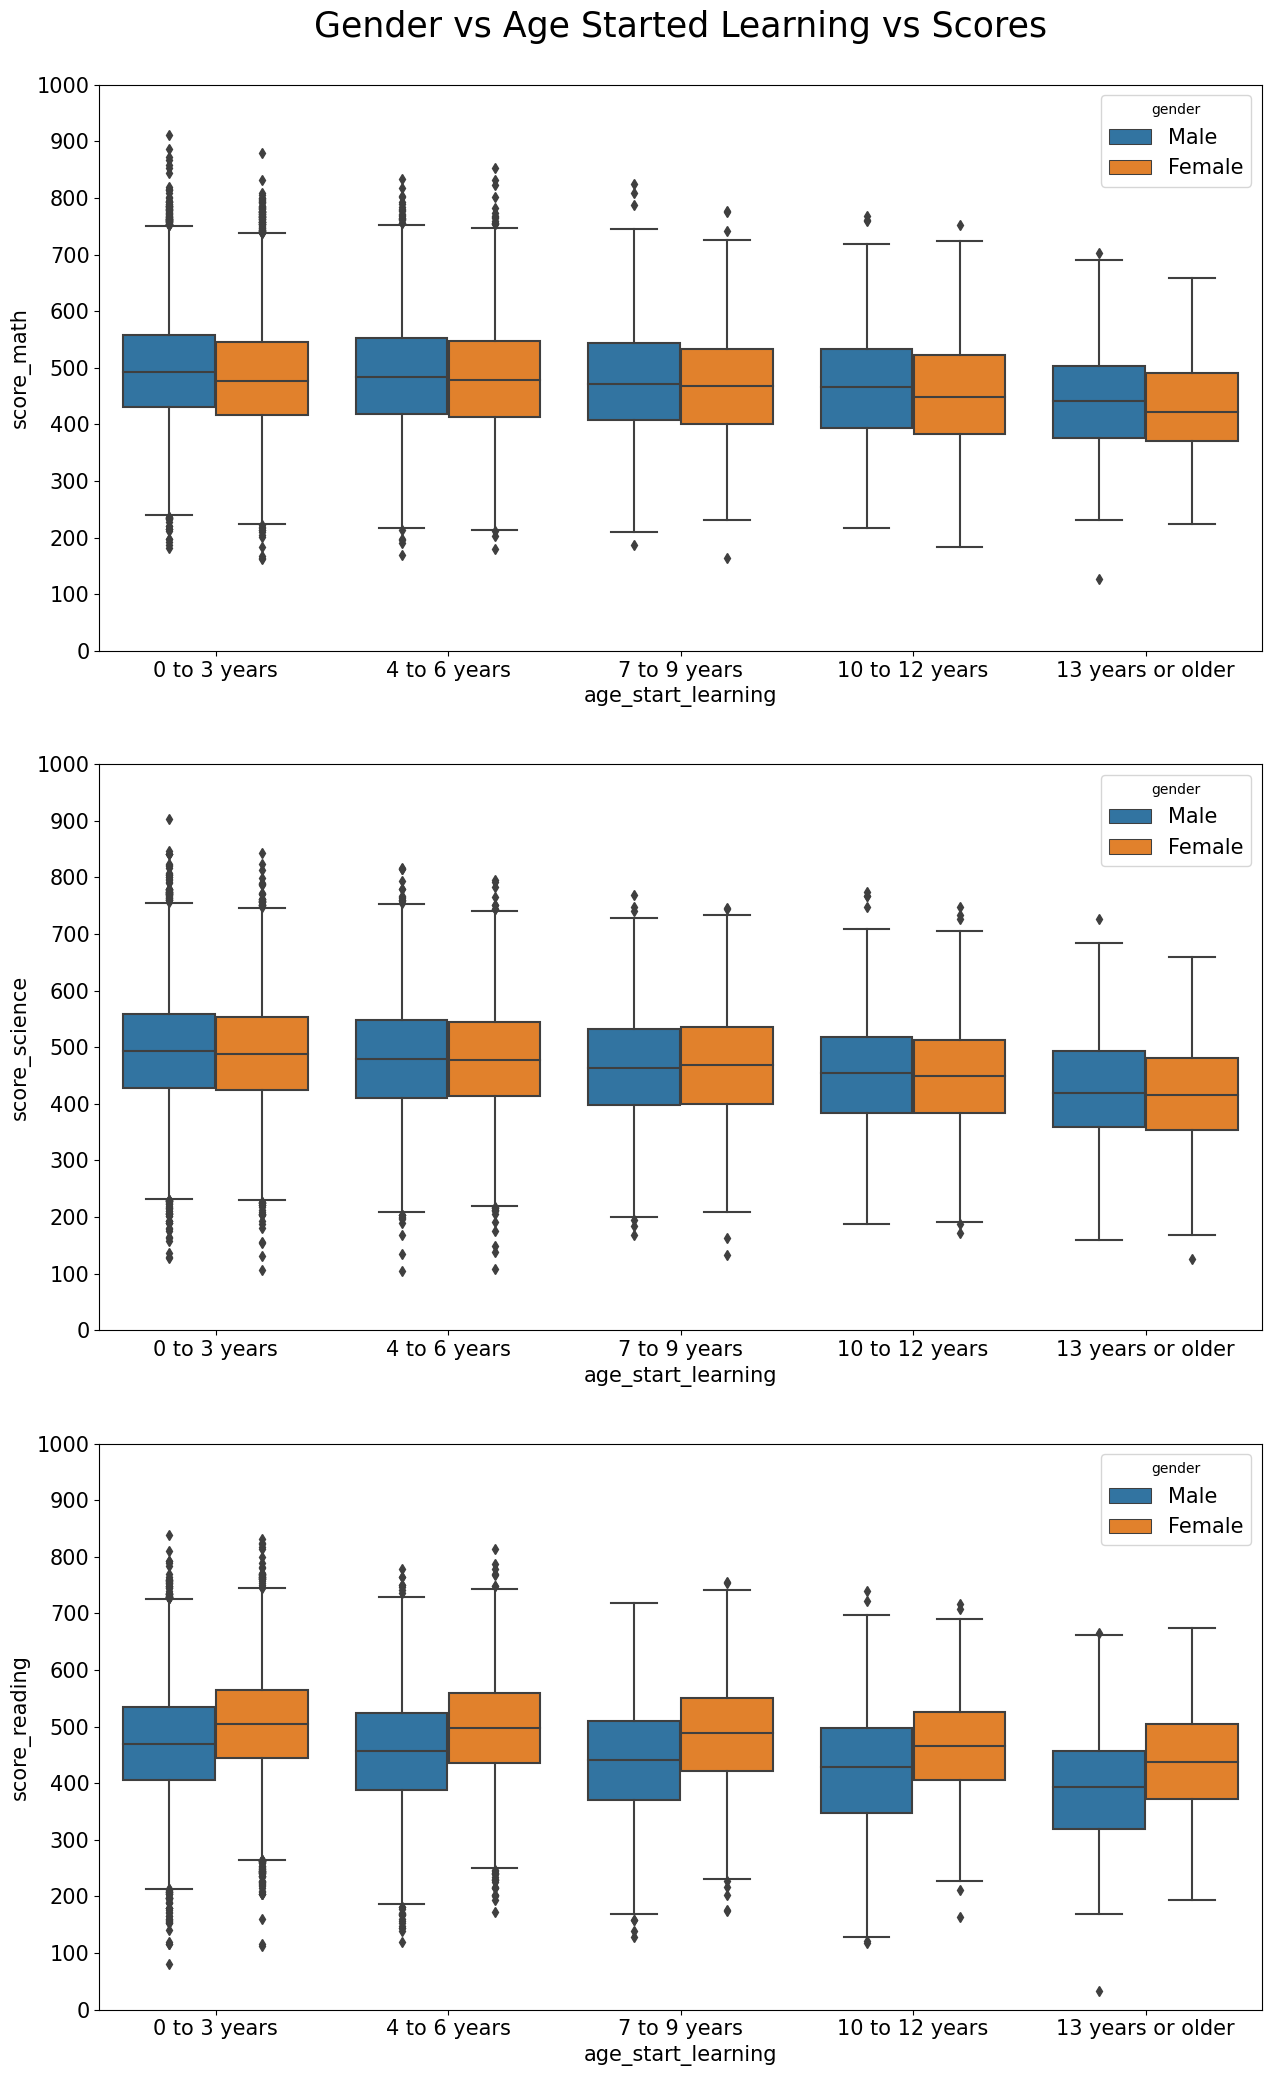

In [53]:
plt.rc('axes', titlesize=25)        # Controls Axes Title
plt.rc('axes', labelsize=15)        # Controls Axes Labels
plt.rc('xtick', labelsize=15)       # Controls x Tick Labels
plt.rc('ytick', labelsize=15)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title

plt.figure(2, figsize=(15,25));
plt.grid(visible = True);

cols = ['score_math','score_science','score_reading']
for i in range(1,4):
    plt.subplot(3,1,i);
    if i == 1:
        plt.title("Gender vs Age Started Learning vs Scores\n ")
    plt.ylim(0,1000)
    plt.yticks(range(0,1100,100))
    sb.boxplot(data=df_student, x=df_student.age_start_learning,y= cols[i-1], hue= "gender");

#### Observation:
- Males scored higher in mathematics on average across the age groups
- Females scored higher in reading on avergae across the age groups
- The decline in scores is consistent in both genders across the age groups
- Both genders scored closely on average in science across the age groups

#### Question #14: Gender vs Country vs Score

#### Visualization:


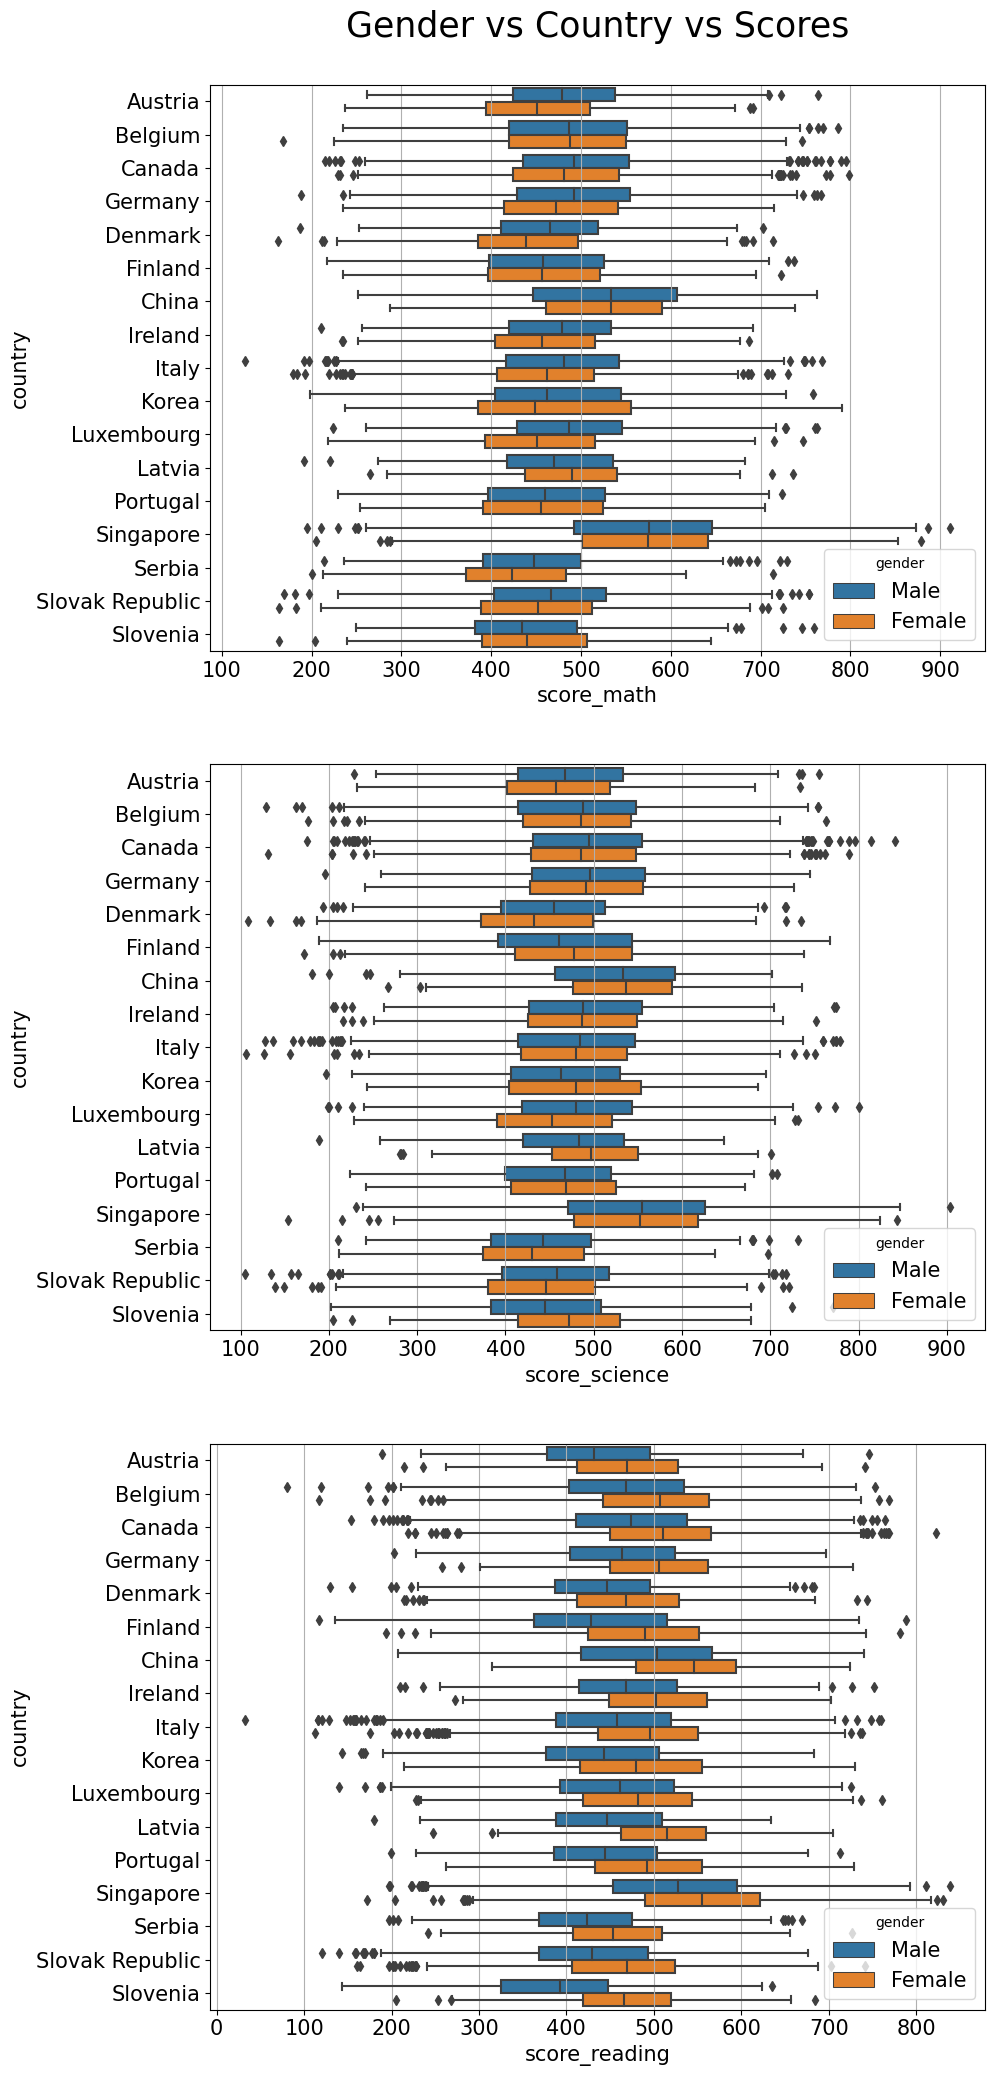

In [54]:
plt.rc('axes', titlesize=25)        # Controls Axes Title
plt.rc('axes', labelsize=15)        # Controls Axes Labels
plt.rc('xtick', labelsize=15)       # Controls x Tick Labels
plt.rc('ytick', labelsize=15)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title

plt.figure(2, figsize=(10,25));

cols = ['score_math','score_science','score_reading']
for i in range(1,4):
    plt.subplot(3,1,i);
    plt.grid(visible=True)
    if i == 1:
        plt.title("Gender vs Country vs Scores\n ")
    plt.ylim(0,1000)
    plt.yticks(range(0,1100,100))
    sb.boxplot(data=df_student, y=df_student.country,x= cols[i-1], hue= "gender");

#### Observation:

- China and Singapore had highest scores with both genders. Males had higher scores in science and maths, but Females had higher scores in reading
- Slovenia and Latvia had highest scores for females against males in all three subjects


#### Question #15: Gender vs Wealth vs Country
#### Visualization:

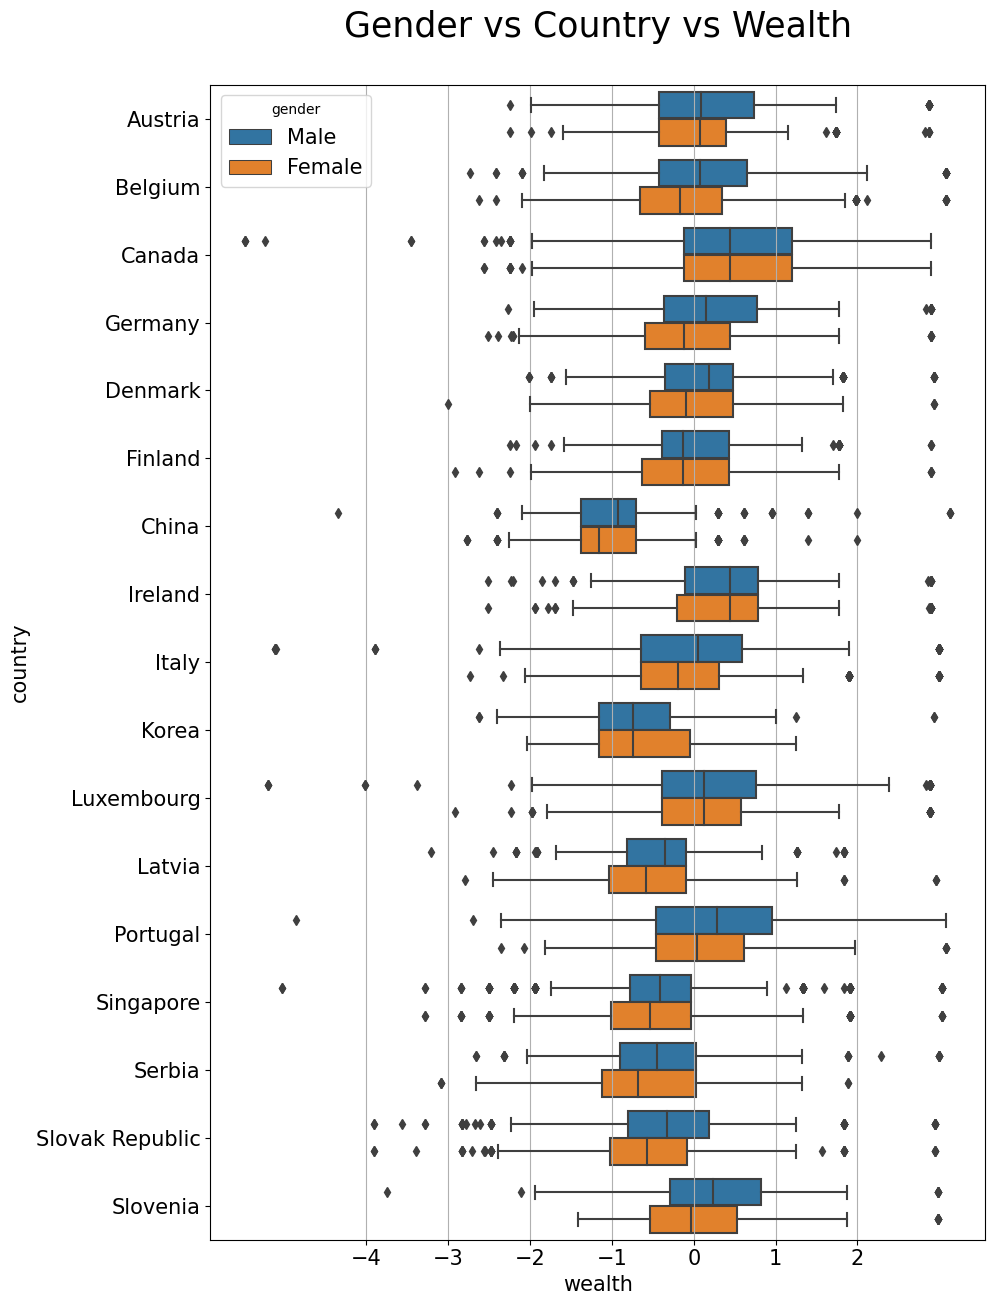

In [55]:
plt.rc('axes', titlesize=25)        # Controls Axes Title
plt.rc('axes', labelsize=15)        # Controls Axes Labels
plt.rc('xtick', labelsize=15)       # Controls x Tick Labels
plt.rc('ytick', labelsize=15)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title

plt.figure(figsize=(10,15));
plt.grid(visible=True)
plt.title("Gender vs Country vs Wealth\n ")
plt.ylim(0,1000)
plt.xticks(range(-4,3,1))
sb.boxplot(data=df_student, y=df_student.country,x= "wealth", hue= "gender");

#### Observation:

- Females had lesser wealth tendency than males in all countries
- China, although it had highest scores, it scored lowest on wealth tendency for both male and females

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- There is a clear relation between age started learning and score performance (earlier learning age leads to higher average score)
- Females were always on the lower average than males across all countries

### Were there any interesting or surprising interactions between features?

- Females scored higher on reading tests than males on average across all age groups
- Wealth tendency didn't translate a clear correlation with higher score performace (was expecting increased wealth tendency would show increase in scores)

## Conclusions <a class='anchor' id ='conclusion'></a>

In this study, we explored the PISA2012 student survey which collceted answers from highschool students in over 600 features. I have selected around 27 points of interest, with 3 being my focus: maths score, science score, and reading score. Other features include: gender, country of origin, age started learning, wealth, time playing videogames, time using social media and read news.

Starting with data wrangling, I wanted to ensure a consistent and easily reproduceable process. I created a cell that requests the dataset link, downloading the zipped file, and unzipping it upon finishing the download task. In case of interrupted connection, the cell will check and continue the download when ran again. When loading the dataset, I had to specify the columns I im interested to pull instead of loading the entire file. Doing so helps reduce the amount of memory needed to load the dataset with only the features we need.

After cleaning the data, I checked for normal distribution of scores which were normally distributed. Some of the significant findings include females scoring higher in mean score of reading than males, and females always marking lower on wealth tendency than males, and finally the earlier the student starts learning, the higher their scores tend to be. In countries like China and Singapore, they scored higher in all three topics. Unexpectedly, Latvia and Slovakia had higher female scores than males in all three subjects


In [56]:
!jupyter nbconvert --to html Part_I_exploration_template.ipynb

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.
